In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
data=pd.read_csv('pubg.csv')

In [3]:
data.shape

(1111742, 30)

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x:'%.3f' % x)

In [5]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.930,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.000,0,0.000,0,0,151.300,1,1525,0.067
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.710,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.000,0,0.000,0,0,1918.000,7,1516,0.586
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.730,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.000,0,0.000,0,0,820.000,7,0,0.810
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.000,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.000,0,0.000,0,0,38.810,0,1515,0.556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.000,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.400,0,0.000,0,0,1721.000,5,0,0.643


In [6]:
data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [7]:
# Deleting unnecessary columns

data.drop(['Unnamed: 0', 'Id', 'groupId', 'matchId'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   assists          1111742 non-null  int64  
 1   boosts           1111742 non-null  int64  
 2   damageDealt      1111742 non-null  float64
 3   DBNOs            1111742 non-null  int64  
 4   headshotKills    1111742 non-null  int64  
 5   heals            1111742 non-null  int64  
 6   killPlace        1111742 non-null  int64  
 7   killPoints       1111742 non-null  int64  
 8   kills            1111742 non-null  int64  
 9   killStreaks      1111742 non-null  int64  
 10  longestKill      1111742 non-null  float64
 11  matchDuration    1111742 non-null  int64  
 12  matchType        1111742 non-null  object 
 13  maxPlace         1111742 non-null  int64  
 14  numGroups        1111742 non-null  int64  
 15  rankPoints       1111742 non-null  int64  
 16  revives          1

## Univariate Analysis

### Analysing assists

assists - Number of enemy players this player damaged that were killed by teammates.

In [9]:
data['assists'].describe()

count   1111742.000
mean          0.234
std           0.589
min           0.000
25%           0.000
50%           0.000
75%           0.000
max          17.000
Name: assists, dtype: float64

In [10]:
# Getting the unique values

data['assists'].unique()

array([ 0,  2,  1,  3,  4,  5,  6, 12, 10,  7, 11,  8,  9, 13, 15, 17],
      dtype=int64)

In [11]:
# Getting the count of unique values

data['assists'].value_counts()

0     917131
1     147785
2      34274
3       8887
4       2491
5        710
6        249
7         97
8         55
9         25
10        14
11         9
13         6
12         5
15         3
17         1
Name: assists, dtype: int64

<AxesSubplot:xlabel='assists', ylabel='count'>

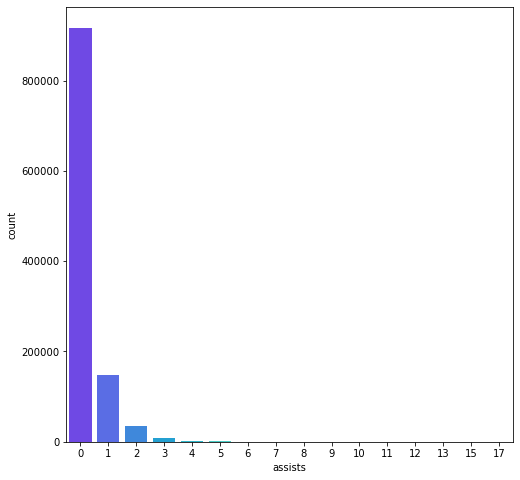

In [12]:
# Plotting the countplot of assist

plt.figure(figsize=(8,8))
sns.countplot(x=data['assists'],palette='rainbow')

1. No assist accounts for 82.49494936774899% of the whole data.
2. Mostly there were 0 or 1 assists which accounts 95.78805154433313% of the whole data.

In [13]:
print(f"% of no assists are: {data['assists'].value_counts()[0]/data['assists'].shape[0]*100}%")
print(f"% of no assists are: {(data['assists'].value_counts()[0]+data['assists'].value_counts()[1])/data['assists'].shape[0]*100}%")

% of no assists are: 82.49494936774899%
% of no assists are: 95.78805154433313%


<Figure size 576x576 with 0 Axes>

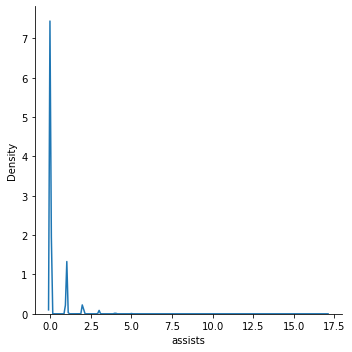

In [14]:
#plotting displot ot check normality

plt.figure(figsize=(8,8))
sns.displot(x=data['assists'],kind='kde')

The dsitribution looks like log distribution

In [15]:
def iqr(data):
    outlier=[]
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    print('Lower limit: ',lower)
    print("Upper limit: ",upper)
    for i in data:
        if i>upper or i< lower:
            outlier.append(i)
    return outlier

<AxesSubplot:ylabel='assists'>

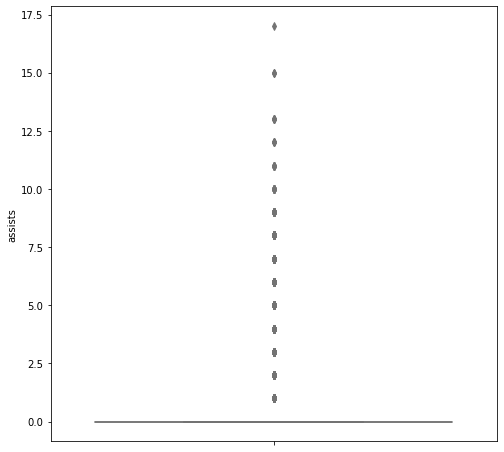

In [16]:
#plotting boxplot to detect outlier

plt.figure(figsize=(8,8))
sns.boxplot(y=data['assists'],palette='rainbow')

1. There are 196611 outliers in the data
2. Percentage of outliers of total data is 0.17505050632251007%

In [17]:
assist_outlier=iqr(data['assists'])
print(len(assist_outlier))

Lower limit:  0.0
Upper limit:  0.0
194611


In [18]:
#Dropping outliers

data['assists']=data[data['assists']<2]

In [19]:
# Filling missing values with median values

data['assists'].replace(np.nan,data['assists'].median(),inplace=True)

<AxesSubplot:ylabel='assists'>

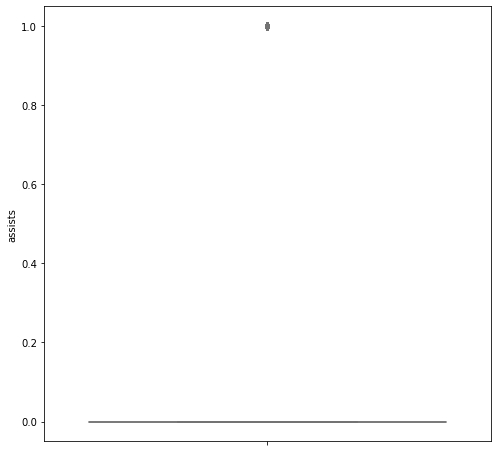

In [20]:
#plotting boxplot to detect outlier

plt.figure(figsize=(8,8))
sns.boxplot(y=data['assists'],palette='rainbow')

Now there are no outliers in the data.

In [21]:
data['assists'].isnull().sum()

0

<AxesSubplot:xlabel='assists', ylabel='count'>

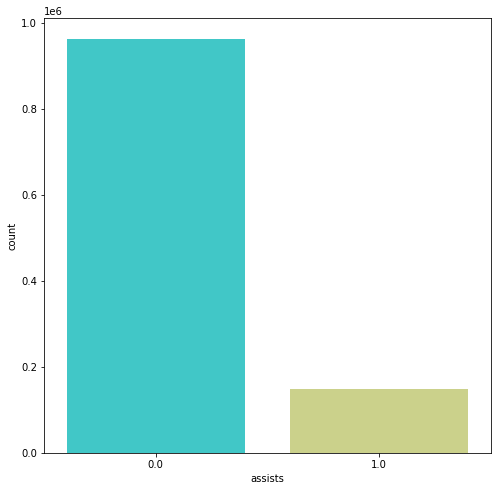

In [22]:
#Plotting the countplot after all  cleaning and preprocessing

plt.figure(figsize=(8,8))
sns.countplot(x=data['assists'],palette='rainbow')

**After cleaning the data['assist'] column this is what countplot looks like, which tells us that:-**

1. Most of the people have killed the enemy themselves without any assist.

In [23]:
data['assists'].value_counts()

0.000    963957
1.000    147785
Name: assists, dtype: int64

### Analysing boosts

boosts - Number of boost items used.


In [24]:
data['boosts'].describe()

count   1111742.000
mean          1.107
std           1.716
min           0.000
25%           0.000
50%           0.000
75%           2.000
max          24.000
Name: boosts, dtype: float64

In [25]:
data['boosts'].unique()

array([ 0,  1,  2,  8,  4,  3,  5,  7,  6, 12,  9, 10, 11, 15, 13, 14, 24,
       17, 16, 18, 20, 21, 19], dtype=int64)

In [26]:
data['boosts'].isnull().sum()

0

In [27]:
data['boosts'].value_counts()

0     630341
1     170364
2     122432
3      74139
4      48835
5      30098
6      17627
7       9295
8       4706
9       2096
10      1043
11       437
12       178
13        83
14        28
15        18
16        10
17         4
18         3
21         2
19         1
20         1
24         1
Name: boosts, dtype: int64

<AxesSubplot:xlabel='boosts', ylabel='count'>

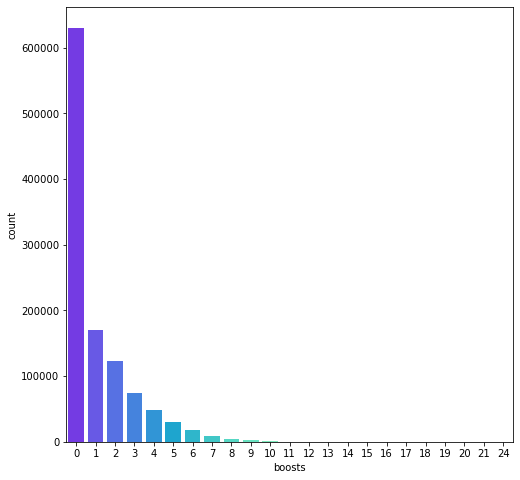

In [28]:
#plotting countplot for visvalizing the value counts

plt.figure(figsize=(8,8))
sns.countplot(x=data['boosts'],palette='rainbow')

1. Most of the peope i.e.630341 people have not used any boosts.
2. Maximum boost is used by one person i.e 24 boosts.
3. There are no null values.

<Figure size 576x576 with 0 Axes>

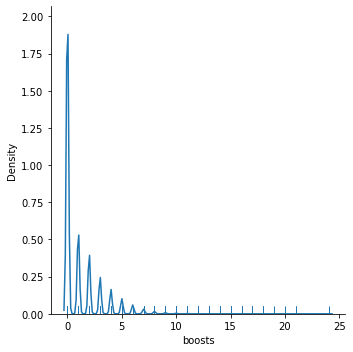

In [29]:
#Plotting displot to type distribution

plt.figure(figsize=(8,8))
sns.displot(x=data['boosts'],kind='kde',rug=True)

There's no regularity in the data.

<AxesSubplot:ylabel='boosts'>

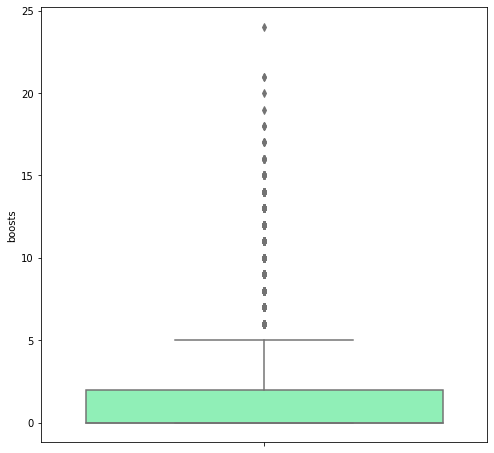

In [30]:
# Plotting boxplot to find outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=data['boosts'],palette='rainbow')

In [31]:
boost_outliers=iqr(data['boosts'])
print(len(boost_outliers))
print(min(boost_outliers))
print(max(boost_outliers))
print("Percentage of outliers of total data is {}%".format(len(boost_outliers)/data['boosts'].shape[0]))

Lower limit:  -3.0
Upper limit:  5.0
35533
6
24
Percentage of outliers of total data is 0.03196155223064344%


In [32]:
# Removing outliers form the boost column

data['boosts']=data[(data['boosts']>-3.0) & data['boosts']<5.0]

<AxesSubplot:ylabel='boosts'>

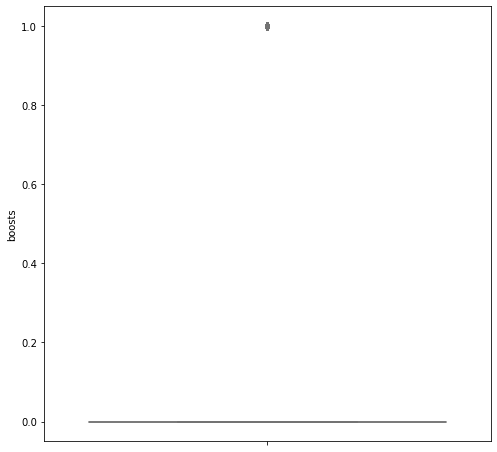

In [33]:
# Plotting boxplot to find outliers

plt.figure(figsize=(8,8))
sns.boxplot(y=data['boosts'],palette='rainbow')

No otuliers in the boost column can be seen.

In [34]:
data['boosts'].isnull().sum()

0

In [35]:
# Filling al the null values with median values

data['boosts'].replace(np.nan,data['boosts'].mean(),inplace=True)

In [36]:
data['boosts'].isnull().sum()

0

<AxesSubplot:xlabel='boosts', ylabel='count'>

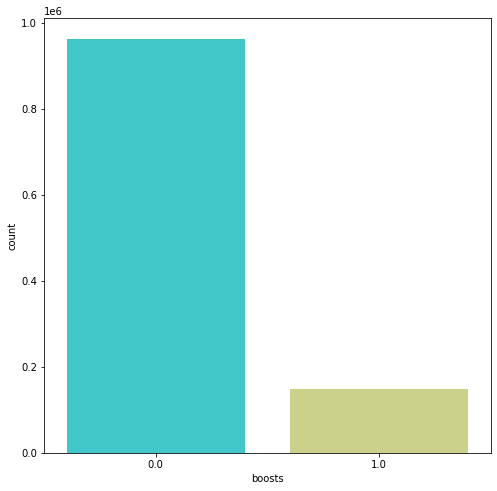

In [37]:
#plotting countplot for visvalizing the value counts

plt.figure(figsize=(8,8))
sns.countplot(x=data['boosts'],palette='rainbow')

1. Most of the people have not used any boosts
2. Some have used only one boost.

In [38]:
data['boosts'].value_counts()

0.000    963957
1.000    147785
Name: boosts, dtype: int64

### Analysing danage dealt

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

In [39]:
data['damageDealt'].describe()

count   1111742.000
mean        130.736
std         171.176
min           0.000
25%           0.000
50%          84.110
75%         185.900
max        5990.000
Name: damageDealt, dtype: float64

In [40]:
data['damageDealt'].unique().shape

(23831,)

<Figure size 576x576 with 0 Axes>

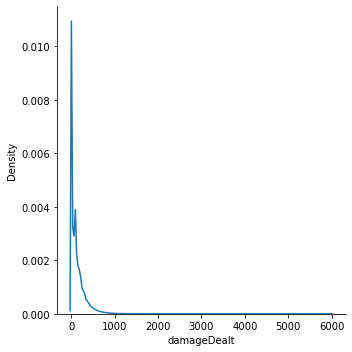

In [41]:
#Plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['damageDealt'],kind='kde',palette='rainbow')

Looks like log distribution.

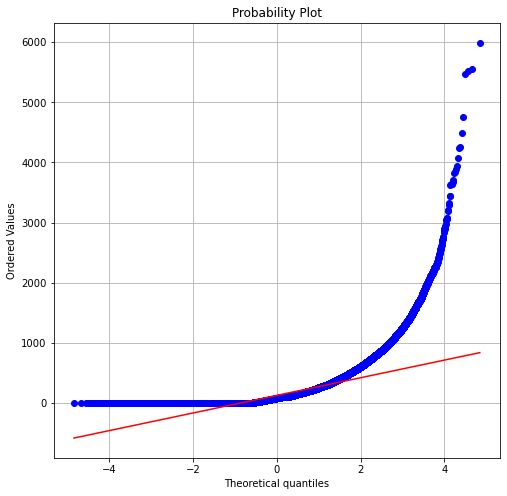

In [42]:
plt.figure(figsize=(8,8))
stats.probplot(x=data['damageDealt'],dist='norm',plot=plt)
plt.grid()

<AxesSubplot:ylabel='damageDealt'>

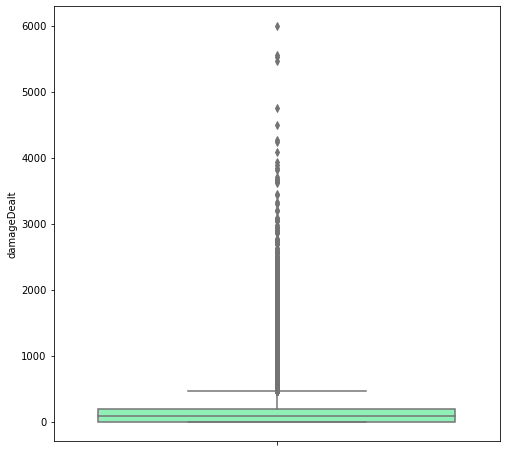

In [43]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['damageDealt'],palette='rainbow')

In [44]:
iqr(data['damageDealt'])

Lower limit:  -278.85
Upper limit:  464.75


[718.0,
 595.1,
 855.1,
 653.3,
 682.3,
 475.3,
 574.9,
 520.9,
 794.1,
 766.2,
 470.2,
 500.5,
 474.3,
 524.7,
 526.9,
 833.2,
 499.6,
 757.0,
 519.8,
 556.0,
 688.6,
 515.6,
 536.9,
 484.7,
 466.8,
 478.0,
 555.5,
 772.0,
 597.2,
 641.5,
 490.3,
 606.3,
 516.3,
 557.4,
 528.3,
 557.9,
 532.3,
 541.3,
 712.8,
 607.5,
 744.0,
 653.9,
 629.1,
 816.6,
 512.1,
 765.2,
 516.7,
 491.5,
 1478.0,
 469.0,
 615.2,
 488.0,
 701.8,
 568.0,
 1027.0,
 1251.0,
 528.2,
 1425.0,
 628.0,
 563.6,
 511.6,
 828.0,
 679.0,
 719.1,
 466.5,
 636.4,
 474.2,
 609.2,
 1075.0,
 592.8,
 509.5,
 593.0,
 606.9,
 495.9,
 646.2,
 782.6,
 527.1,
 553.1,
 651.4,
 741.6,
 733.2,
 470.2,
 547.5,
 546.2,
 973.8,
 659.2,
 643.1,
 480.8,
 915.2,
 556.2,
 509.8,
 534.2,
 623.6,
 559.2,
 521.2,
 485.9,
 525.1,
 615.3,
 895.8,
 888.6,
 469.6,
 853.3,
 488.8,
 751.1,
 636.8,
 674.5,
 590.0,
 1454.0,
 478.2,
 501.4,
 553.1,
 720.7,
 822.0,
 497.2,
 502.2,
 534.7,
 573.6,
 465.0,
 466.3,
 478.4,
 802.7,
 667.9,
 912.6,
 1074.0,
 

In [45]:
data['damageDealt']=data[(data['damageDealt']>-278.85) & (data['damageDealt']<464.75)]

In [46]:
data['damageDealt'].fillna(data['damageDealt'].median(),inplace=True)

<AxesSubplot:ylabel='damageDealt'>

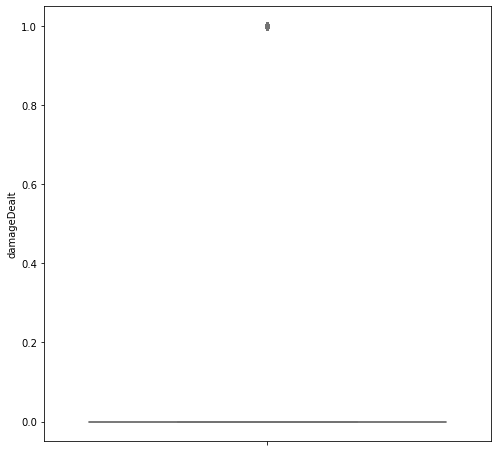

In [47]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['damageDealt'],palette='rainbow')

In [48]:
data['damageDealt'].value_counts()

0.000    979690
1.000    132052
Name: damageDealt, dtype: int64

<AxesSubplot:xlabel='damageDealt', ylabel='count'>

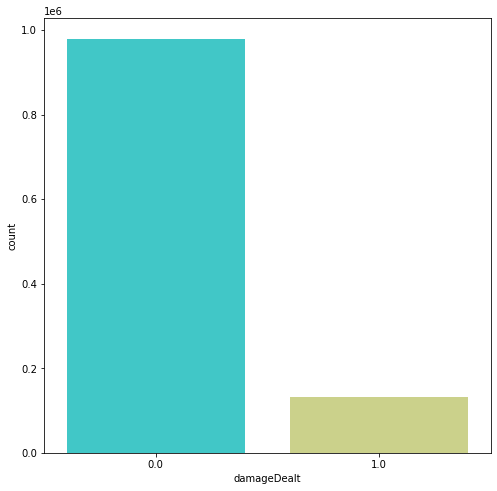

In [49]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['damageDealt'],palette='rainbow')

After cleaning the whole dataset it is bieng found that most of the peole have 0 and 1 damage.

<Figure size 576x576 with 0 Axes>

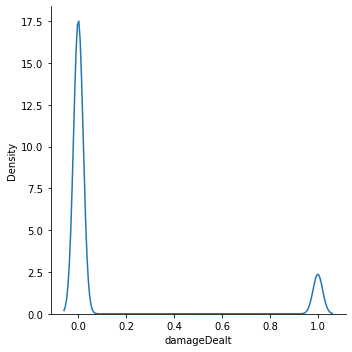

In [50]:
#Plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['damageDealt'],kind='kde',palette='rainbow')

Distribution plot after cleaing the data.

### Analysing DBNOs

Number of enemy players knocked.

In [51]:
data['DBNOs'].describe()

count   1111742.000
mean          0.657
std           1.146
min           0.000
25%           0.000
50%           0.000
75%           1.000
max          35.000
Name: DBNOs, dtype: float64

In [52]:
data['DBNOs'].isnull().sum()

0

In [53]:
data['DBNOs'].unique()

array([ 0,  2,  1,  3,  5,  4,  6,  9,  7,  8, 10, 12, 23, 17, 13, 11, 18,
       16, 15, 14, 20, 22, 19, 21, 27, 28, 25, 24, 32, 33, 35],
      dtype=int64)

In [54]:
data['DBNOs'].value_counts()

0     693673
1     246032
2      98430
3      40535
4      17270
5       7945
6       3818
7       1822
8        917
9        516
10       239
11       172
12       111
13        71
15        42
14        39
16        21
18        21
17        18
21         8
23         8
19         7
20         7
22         7
25         4
24         3
33         2
27         1
28         1
32         1
35         1
Name: DBNOs, dtype: int64

<AxesSubplot:xlabel='DBNOs', ylabel='count'>

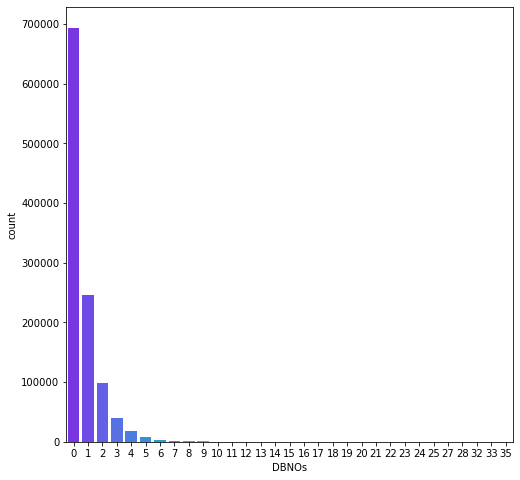

In [55]:
#plotting the countpot

plt.figure(figsize=(8,8))
sns.countplot(x=data['DBNOs'],palette='rainbow')

- From the data it is cleat that 62.39514203835063% of the people have not knocked anyone.
- Around 22.130314407479435 % of the people have knocked only 1 enemy.
- Maximum enemy knocked by a person is 35.

In [56]:
player_kill_0=data['DBNOs'].value_counts()[0]/data['DBNOs'].shape[0]*100
player_kill_1=data['DBNOs'].value_counts()[1]/data['DBNOs'].shape[0]*100
print(f'% of knocked 0 enemy are:{player_kill_0}%')
print(f'% of knocked 1 enemy are:{player_kill_1}%')

% of knocked 0 enemy are:62.39514203835063%
% of knocked 1 enemy are:22.130314407479435%


<Figure size 576x576 with 0 Axes>

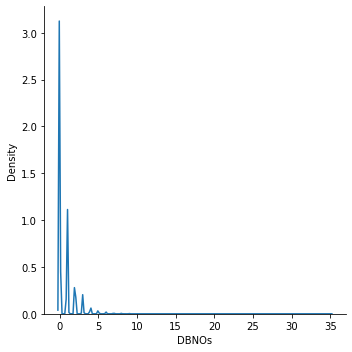

In [57]:
#Plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['DBNOs'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='DBNOs'>

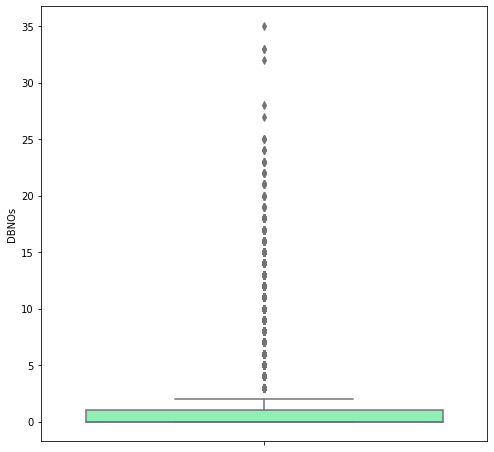

In [58]:
#Plot box plot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['DBNOs'],palette='rainbow')

In [59]:
len(iqr(data['DBNOs']))

Lower limit:  -1.5
Upper limit:  2.5


73607

In [60]:
#Removing the outliers

data['DBNOs']=data[(data['DBNOs']>-1.5) & (data['DBNOs']<2.5)]

In [61]:
data['DBNOs'].unique()

array([0.0, nan, 1.0], dtype=object)

In [62]:
data['DBNOs'].fillna(data['DBNOs'].median(),inplace=True)

<AxesSubplot:ylabel='DBNOs'>

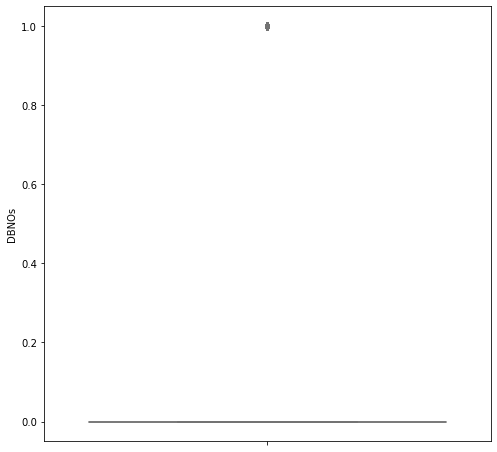

In [63]:
#Plot box plot after cleaning

plt.figure(figsize=(8,8))
sns.boxplot(y=data['DBNOs'],palette='rainbow')

<Figure size 576x576 with 0 Axes>

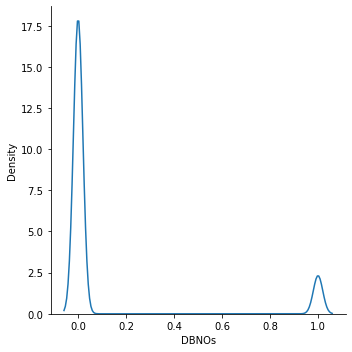

In [64]:
#Plotting the displot after cleaning

plt.figure(figsize=(8,8))
sns.displot(x=data['DBNOs'],kind='kde',palette='rainbow')

### Analysing headshotkills

- Number of enemy players killed with headshots.

In [65]:
data['headshotKills'].describe()

count   1111742.000
mean          0.227
std           0.603
min           0.000
25%           0.000
50%           0.000
75%           0.000
max          64.000
Name: headshotKills, dtype: float64

In [66]:
data['headshotKills'].unique()

array([ 0,  3,  2,  1,  4,  5,  6,  7,  8, 12, 10,  9, 11, 14, 13, 15, 19,
       34, 35, 31, 17, 42, 16, 64, 26, 18], dtype=int64)

In [67]:
data['headshotKills'].value_counts()

0     923812
1     144068
2      31589
3       8185
4       2401
5        883
6        350
7        200
8         94
9         58
10        37
11        15
12        11
13        10
14        10
15         5
17         4
16         2
42         1
18         1
19         1
26         1
31         1
34         1
35         1
64         1
Name: headshotKills, dtype: int64

<AxesSubplot:xlabel='headshotKills', ylabel='count'>

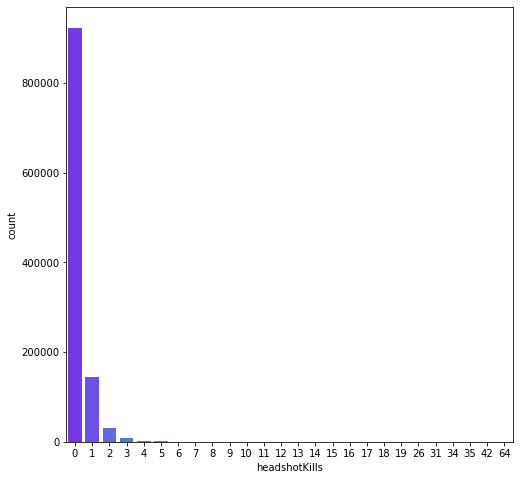

In [68]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['headshotKills'],palette='rainbow')

- 83.09589814903097 % have not killed anyone by headshot.
- 12.958762014927924 % have got only one headshot.
- Maximum headshot a person got is 64.

In [69]:
headshot_0=data['headshotKills'].value_counts()[0]/data['headshotKills'].shape[0]*100
headshot_1=data['headshotKills'].value_counts()[1]/data['headshotKills'].shape[0]*100
print(f"% of 0 headshot kills by people are: {headshot_0} %")
print(f"% if 1 headshot kills by people are: {headshot_1} %")

% of 0 headshot kills by people are: 83.09589814903097 %
% if 1 headshot kills by people are: 12.958762014927924 %


<Figure size 576x576 with 0 Axes>

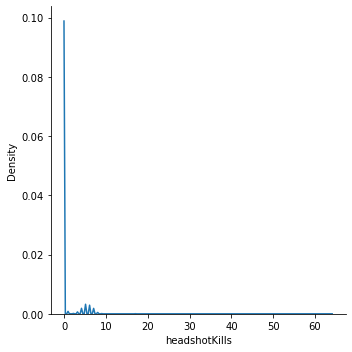

In [70]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['headshotKills'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='headshotKills'>

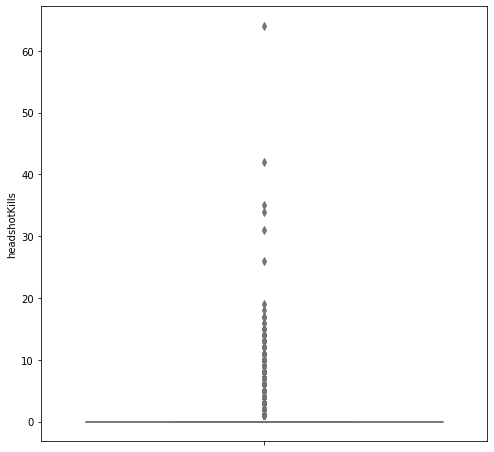

In [71]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['headshotKills'],palette='rainbow')

There are many outliers above 1 and we need to treat them.

In [72]:
iqr(data['headshotKills'])

Lower limit:  0.0
Upper limit:  0.0


[3,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 5,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,


In [73]:
data['headshotKills']=data[(data['headshotKills']>=0) & (data['headshotKills']<=0)]

In [74]:
data['headshotKills'].unique()

array([0.0, nan, 1.0], dtype=object)

In [75]:
data['headshotKills'].fillna(data['headshotKills'].median(),inplace=True)

<AxesSubplot:ylabel='headshotKills'>

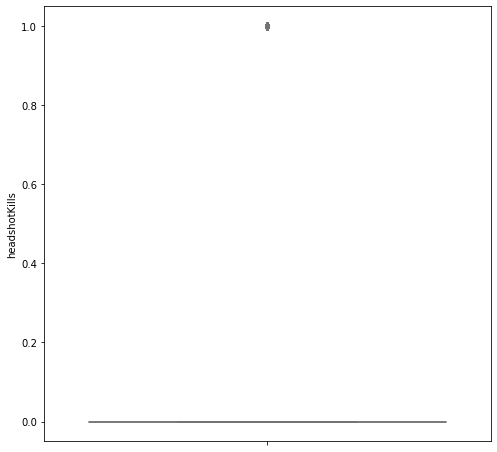

In [76]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['headshotKills'],palette='rainbow')

We have treated approx. all the outliers.

<AxesSubplot:xlabel='headshotKills', ylabel='count'>

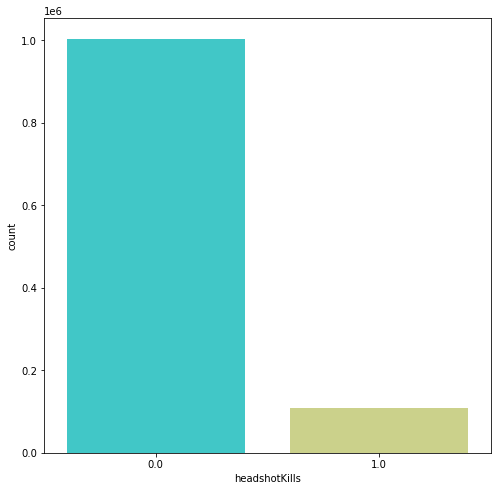

In [77]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['headshotKills'],palette='rainbow')

After cleaning the data it is clear that most of the people have got only o or 1 headshot.

<Figure size 576x576 with 0 Axes>

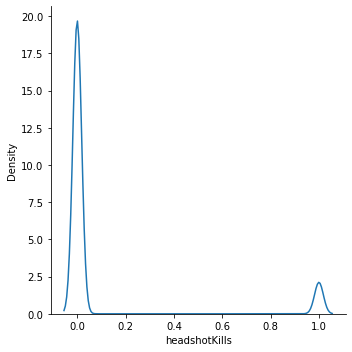

In [78]:
#plotting the displot after cleaning the data

plt.figure(figsize=(8,8))
sns.displot(x=data['headshotKills'],kind='kde',palette='rainbow')

In [79]:
data['headshotKills'].value_counts()[0]

1003910

### Analysing heals

- Number of healing items used.

In [80]:
data['heals'].describe()

count   1111742.000
mean          1.370
std           2.684
min           0.000
25%           0.000
50%           0.000
75%           2.000
max          73.000
Name: heals, dtype: float64

In [81]:
data['heals'].unique()

array([ 0,  3,  1, 15,  2,  4,  6,  5,  9,  8, 13,  7, 10, 12, 18, 19, 14,
       16, 11, 20, 23, 17, 30, 24, 27, 22, 26, 25, 21, 33, 42, 28, 29, 31,
       36, 35, 48, 39, 34, 49, 32, 45, 37, 40, 43, 59, 41, 38, 44, 73, 47,
       54, 52, 62, 63], dtype=int64)

In [82]:
data['heals'].value_counts()

0     662251
1     168295
2      79695
3      50617
4      35473
5      33786
6      21957
7      16036
8      10922
9       7491
10      6406
11      4705
12      3372
13      2399
14      1864
15      1531
16      1144
17       845
18       607
19       475
20       405
21       302
22       254
23       168
25       126
24       122
26       100
27        77
28        63
29        42
31        37
30        31
32        23
33        20
35        15
34        13
37        11
38         9
39         9
40         7
36         7
45         4
48         4
49         4
44         3
47         3
42         2
43         2
59         2
54         1
62         1
63         1
52         1
41         1
73         1
Name: heals, dtype: int64

<AxesSubplot:xlabel='heals', ylabel='count'>

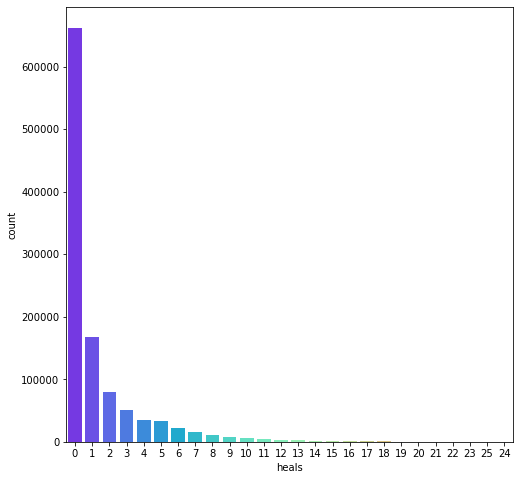

In [83]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['heals'],palette='rainbow',order=data['heals'].value_counts().iloc[:26].index)

<AxesSubplot:xlabel='heals', ylabel='count'>

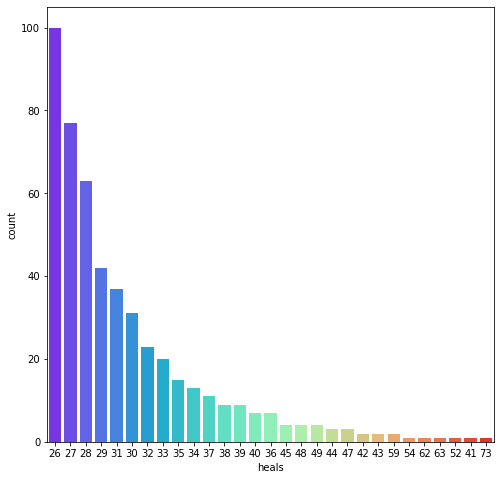

In [84]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['heals'],palette='rainbow',order=data['heals'].value_counts().iloc[26:].index)

- Maximum heals used by a person is 73.
- % of people have used 0 heals are: 59.5687668541802%
- % of people have used 1 heals are: 15.137954669338749%

In [85]:
heals_0=data['heals'].value_counts()[0]/data['heals'].shape[0]*100
heals_1=data['heals'].value_counts()[1]/data['heals'].shape[0]*100
print(f"% of people have used 0 heals are: {heals_0}%")
print(f"% of people have used 1 heals are: {heals_1}%")

% of people have used 0 heals are: 59.5687668541802%
% of people have used 1 heals are: 15.137954669338749%


<Figure size 576x576 with 0 Axes>

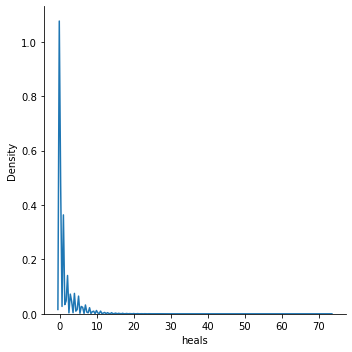

In [86]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['heals'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='heals'>

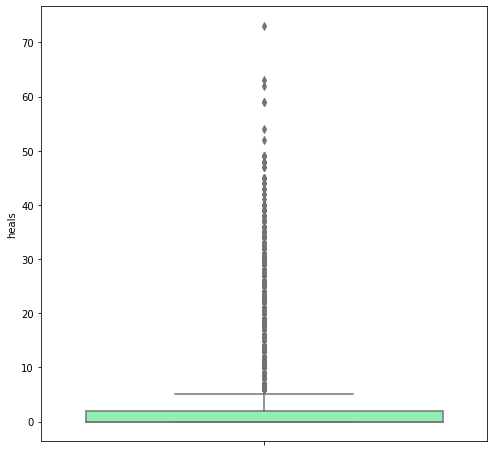

In [87]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['heals'],palette='rainbow')

In [88]:
len(iqr(data['heals']))

Lower limit:  -3.0
Upper limit:  5.0


81625

In [89]:
#Dealing with outlirs

data['heals']=data[(data['heals']>-3) & (data['heals']<5)]

<AxesSubplot:ylabel='heals'>

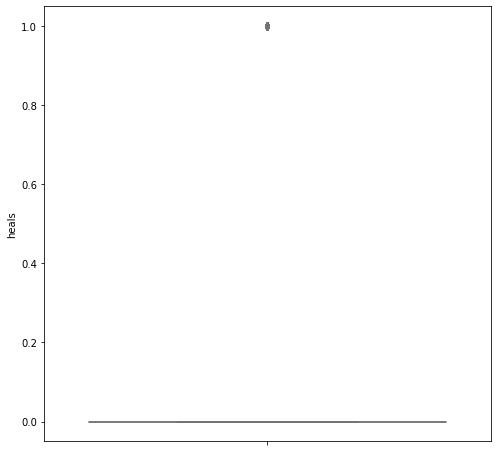

In [90]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['heals'],palette='rainbow')

Now, we can see we have eliminated approx. all the outliers.

In [91]:
data['heals'].unique()

array([0.0, nan, 1.0], dtype=object)

In [92]:
data['heals'].fillna(data['heals'].median(),inplace=True)

<AxesSubplot:xlabel='heals', ylabel='count'>

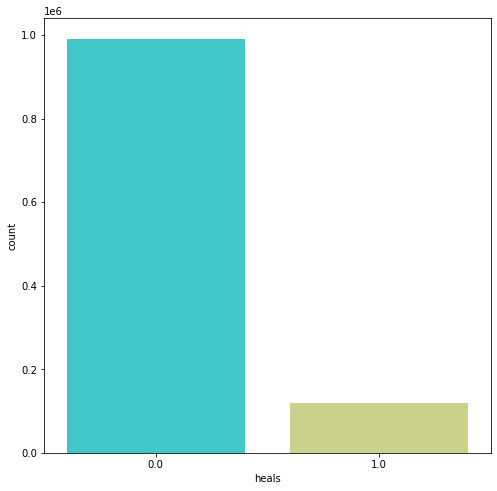

In [93]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['heals'],palette='rainbow')

After cleaning the data we can see that most of the people have used 0 and 1 heal

<Figure size 576x576 with 0 Axes>

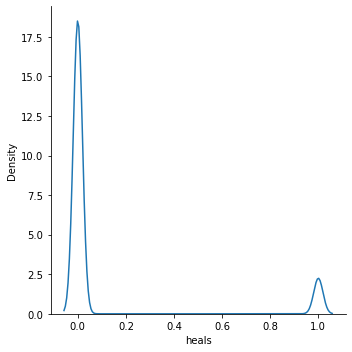

In [94]:
#plotting the displot after cleaning

plt.figure(figsize=(8,8))
sns.displot(x=data['heals'],kind='kde',palette='rainbow')

### Analysing killPlace

- Ranking in match of number of enemy players killed.

In [95]:
data['killPlace'].describe()

count   1111742.000
mean         47.596
std          27.470
min           1.000
25%          24.000
50%          47.000
75%          71.000
max         100.000
Name: killPlace, dtype: float64

In [96]:
data['killPlace'].unique()

array([ 84,  57,  50,  56,  31,  59,  81,  25,   6,   8,  96,  85,  63,
        88,  91,  95,  87,  80,  67,  36,  17,  11,  43,  22,  48,  29,
        65,  38,  66,  71,  92,  51,  39,   2,  90,   7,  60,  12,  37,
        46,  54,  30,  10,  28,  74,  34,  26,  23,  86,  53,  47,  20,
        83,  44,  49,  75,  58,  64,  19,  62,  41,  55,  94,  61,   9,
        42,  15,  73,  16,  13,  99,  33,  35,  93,  76,  52,  32,  40,
        27,  77,  18,   4,  21,  89,  24,  79,  72,  14,  82,  45,  69,
        68,  97,   3,   1,   5,  78,  70,  98, 100], dtype=int64)

In [97]:
data['killPlace'].value_counts()

6      12143
4      12090
17     12089
36     12078
7      12055
14     12054
11     12052
16     12020
10     12007
3      11995
9      11993
1      11955
15     11937
2      11934
29     11932
27     11913
38     11905
18     11900
13     11876
23     11872
12     11870
48     11870
28     11870
45     11862
20     11852
19     11847
25     11839
8      11838
21     11834
24     11831
52     11821
55     11804
22     11803
41     11800
61     11797
35     11790
46     11784
5      11766
56     11757
50     11756
43     11748
39     11741
26     11734
34     11734
60     11718
37     11713
49     11708
40     11705
31     11699
51     11698
64     11697
32     11693
79     11683
66     11676
70     11674
78     11671
30     11667
47     11657
62     11653
44     11652
63     11649
42     11648
76     11645
71     11628
58     11620
33     11606
82     11597
57     11588
74     11584
77     11579
65     11571
67     11571
73     11567
84     11561
75     11548
53     11544
54     11543

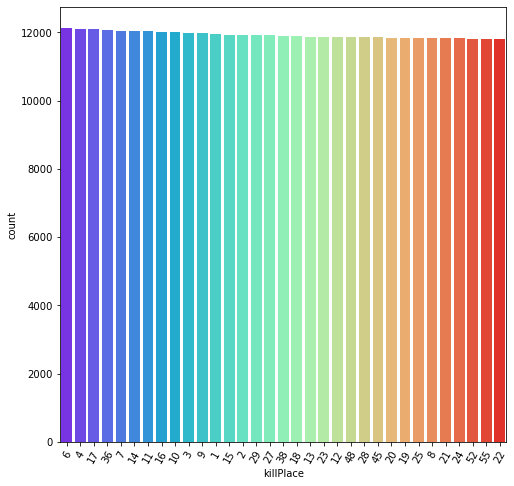

In [98]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['killPlace'],order=data['killPlace'].value_counts().iloc[:33].index,palette='rainbow')
plt.xticks(rotation=60)
plt.show()

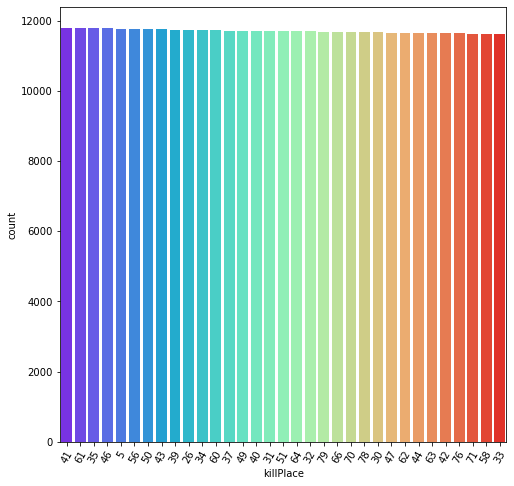

In [99]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['killPlace'],order=data['killPlace'].value_counts().iloc[33:66].index,palette='rainbow')
plt.xticks(rotation=60)
plt.show()

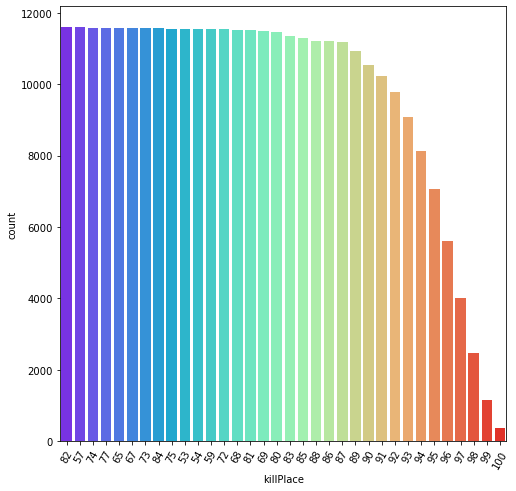

In [100]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['killPlace'],order=data['killPlace'].value_counts().iloc[66:].index,palette='rainbow')
plt.xticks(rotation=60)
plt.show()

- Rank 1 is received by 11955 people.
- Rank 100 is received by 372 people

In [101]:
rank_1=data['killPlace'].value_counts()[1]
rank_100=data['killPlace'].value_counts()[100]
print(f"Rank 1 is received by {rank_1} people. ")
print(f"Rank 100 is received by {rank_100} people.")

Rank 1 is received by 11955 people. 
Rank 100 is received by 372 people.


<Figure size 576x576 with 0 Axes>

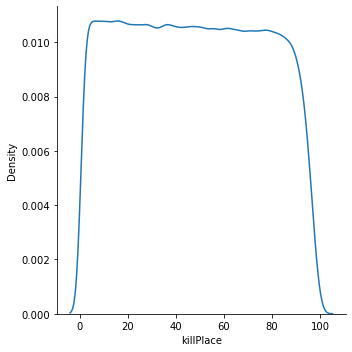

In [102]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['killPlace'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='killPlace'>

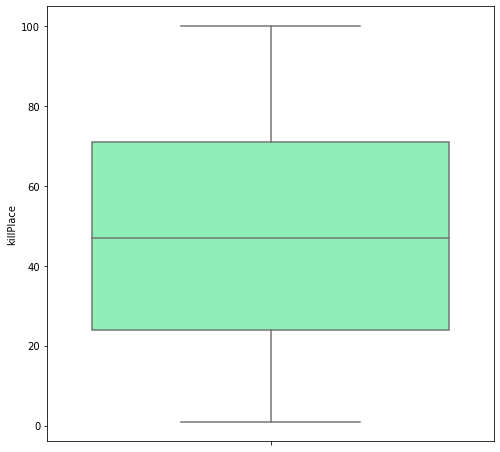

In [103]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['killPlace'],palette='rainbow')

There are no outliers in the killPlace.

### Analysing the killPoints
- Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

In [104]:
data['killPoints'].describe()

count   1111742.000
mean        504.430
std         627.401
min           0.000
25%           0.000
50%           0.000
75%        1171.000
max        2170.000
Name: killPoints, dtype: float64

In [105]:
data['killPoints'].unique().shape

(1489,)

In [106]:
data['killPoints'].head()

0    1437
1    1225
2       0
3    1286
4       0
Name: killPoints, dtype: int64

In [107]:
data['killPoints'].isnull().sum()

0

<Figure size 576x576 with 0 Axes>

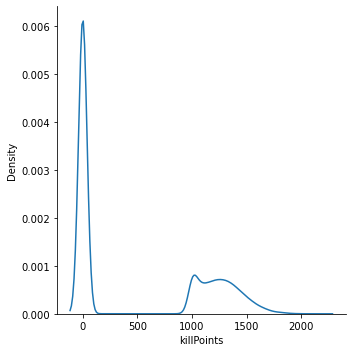

In [108]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['killPoints'],kind='kde',palette='rainbow')

- Most of the poepe have killpoint between 0 and 200
- Some of the people have killpoint between 900 and 1700
- % of people who scored 0 kill points are: 59.76485551503856%
- Maximum kill points scored is 2170 by 1 person

In [109]:
kill_0=data['killPoints'].value_counts()[0]/data['killPoints'].shape[0]*100
print(f"% of people who scored 0 kill points are: {kill_0}%")
print(f"Maximum kill points scored is {data['killPoints'].max()} by {data['killPoints'].value_counts()[data['killPoints'].max()]} person")

% of people who scored 0 kill points are: 59.76485551503856%
Maximum kill points scored is 2170 by 1 person


<AxesSubplot:ylabel='killPoints'>

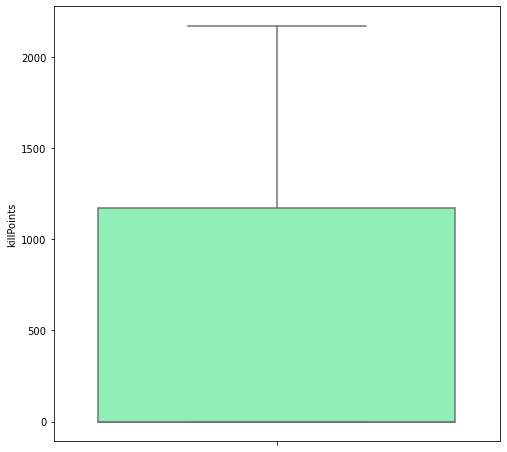

In [110]:
#plotting the barplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['killPoints'],palette='rainbow')

There are no outlier in the killpoints.

### Analysing kills
- Number of enemy players killed.

In [111]:
data['kills'].describe()

count   1111742.000
mean          0.926
std           1.562
min           0.000
25%           0.000
50%           0.000
75%           1.000
max          72.000
Name: kills, dtype: float64

In [112]:
data['kills'].unique()

array([ 0,  1,  4,  3,  2,  5,  6,  7,  8, 13, 10, 12,  9, 11, 26, 16, 15,
       23, 18, 17, 19, 14, 20, 21, 22, 24, 34, 38, 33, 29, 30, 36, 53, 40,
       42, 32, 39, 50, 37, 27, 47, 25, 56, 72, 35, 28, 55, 41, 44],
      dtype=int64)

In [113]:
data['kills'].value_counts()

0     632149
1     232156
2     118274
3      58026
4      31302
5      16600
6       9429
7       5458
8       3139
9       1934
10      1131
11       713
12       451
13       283
14       199
15       126
16        78
17        61
18        53
19        29
21        27
20        24
22        22
23        17
24        11
26         9
30         5
33         3
27         3
40         3
38         3
25         3
36         2
39         2
37         2
29         2
47         1
50         1
42         1
53         1
55         1
44         1
56         1
41         1
35         1
34         1
32         1
28         1
72         1
Name: kills, dtype: int64

<AxesSubplot:xlabel='kills', ylabel='count'>

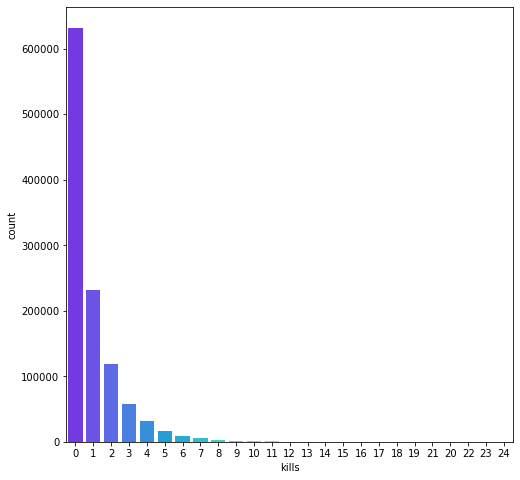

In [114]:
#Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['kills'],order=data['kills'].value_counts().iloc[:25].index,palette='rainbow')

<AxesSubplot:xlabel='kills', ylabel='count'>

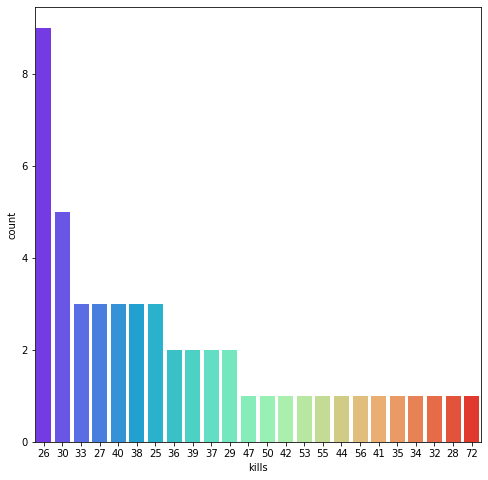

In [115]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['kills'],order=data['kills'].value_counts().iloc[25:].index,palette='rainbow')

- Maximum people got 0 kill
- Maximum kill by a person is 72
- % of people who got 0 kills are 56.861124253648775%
- % of people who got 1 kill are 20.882183096437842%


In [116]:
kills_0=data['kills'].value_counts()[0]/data['kills'].shape[0]*100
kills_1=data['kills'].value_counts()[1]/data['kills'].shape[0]*100
print(f"% of people who got 0 kills are {kills_0}%")
print(f"% of people who got 1 kill are {kills_1}%")

% of people who got 0 kills are 56.861124253648775%
% of people who got 1 kill are 20.882183096437842%


<Figure size 576x576 with 0 Axes>

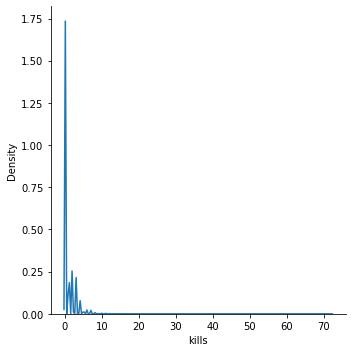

In [117]:
#plotting the dispot

plt.figure(figsize=(8,8))
sns.displot(x=data['kills'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='kills'>

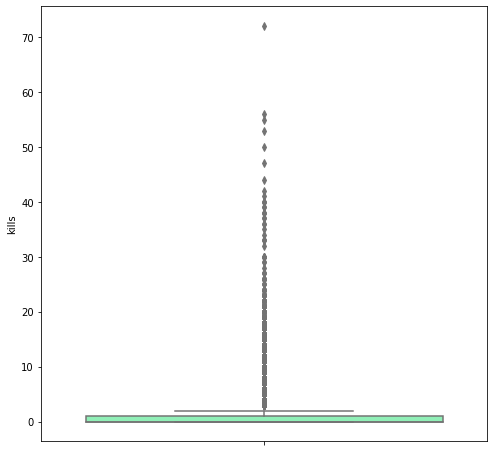

In [118]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['kills'],palette='rainbow')

- value above 2.5 and below -1.5 are outliers
- there are 129163 outliers which consists

In [119]:
outliers=(iqr(data['kills']))

Lower limit:  -1.5
Upper limit:  2.5


In [120]:
print(f"% of outliers in the kills are {129163/data['kills'].shape[0]*100}%")

% of outliers in the kills are 11.618073258004106%


In [121]:
data['kills']=data[(data['kills']<2.5) & (data['kills']>-1.5)]

In [122]:
data['kills'].isnull().sum()

129163

In [123]:
data['kills'].fillna(data['kills'].median(),inplace=True)

In [124]:
data['kills'].isnull().sum()

0

<AxesSubplot:ylabel='kills'>

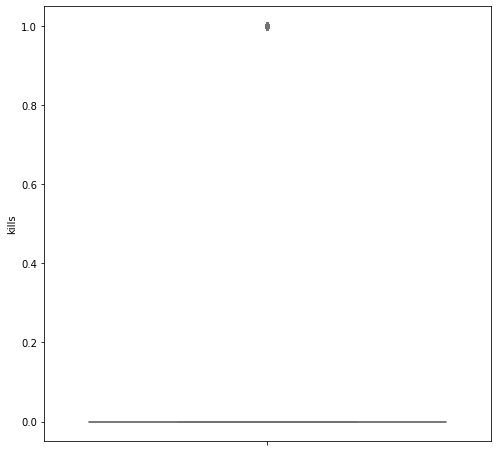

In [125]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['kills'],palette='rainbow')

- After cleaning the data there are no outliers

<Figure size 576x576 with 0 Axes>

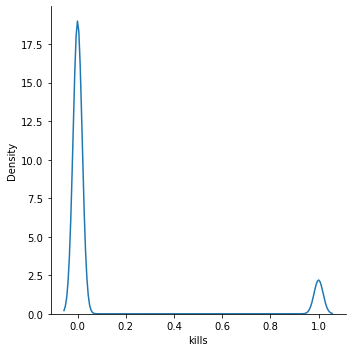

In [126]:
#plotting the dispot after cleaning the data

plt.figure(figsize=(8,8))
sns.displot(x=data['kills'],kind='kde',palette='rainbow')

### Analysinng killStreaks
- Max number of enemy players killed in a short amount of time.

In [127]:
data['killStreaks'].describe()

count   1111742.000
mean          0.545
std           0.713
min           0.000
25%           0.000
50%           0.000
75%           1.000
max          20.000
Name: killStreaks, dtype: float64

In [128]:
data['killStreaks'].unique()

array([ 0,  1,  2,  4,  3,  5,  9, 16,  7,  6, 13,  8, 12, 10, 20],
      dtype=int64)

In [129]:
data['killStreaks'].value_counts()

0     632149
1     368901
2      97301
3      11708
4       1520
5         84
6         36
7         16
9         10
8          7
13         4
12         2
10         2
20         1
16         1
Name: killStreaks, dtype: int64

<AxesSubplot:xlabel='killStreaks', ylabel='count'>

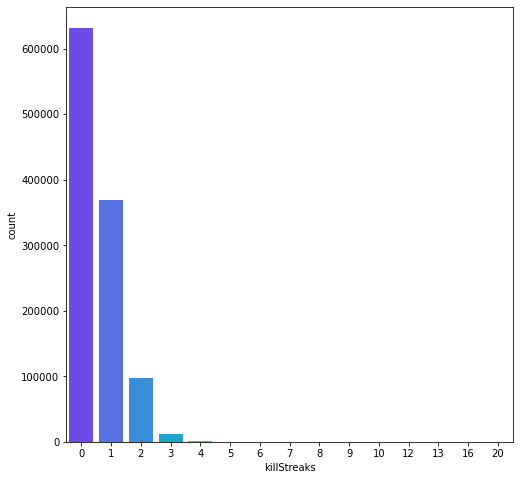

In [130]:
# Plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['killStreaks'],palette='rainbow')

- Maximum poeple have 0 killStreak.
- Maximum kilStreak by any person is 20.
- % of people with 0 killStreak are 56.861124253648775%
- % of people with 1 killStreak are 33.18224911895026%

In [131]:
killS_0=data['killStreaks'].value_counts()[0]/data['killStreaks'].shape[0]*100
killS_1=data['killStreaks'].value_counts()[1]/data['killStreaks'].shape[0]*100
print(f"% of people with 0 killStreak are {killS_0}%")
print(f"% of people with 1 killStreak are {killS_1}%")

% of people with 0 killStreak are 56.861124253648775%
% of people with 1 killStreak are 33.18224911895026%


<Figure size 576x576 with 0 Axes>

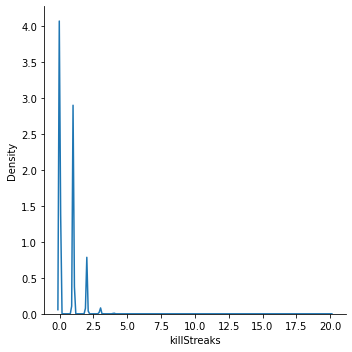

In [132]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['killStreaks'],kind='kde',palette='rainbow')

<AxesSubplot:ylabel='killStreaks'>

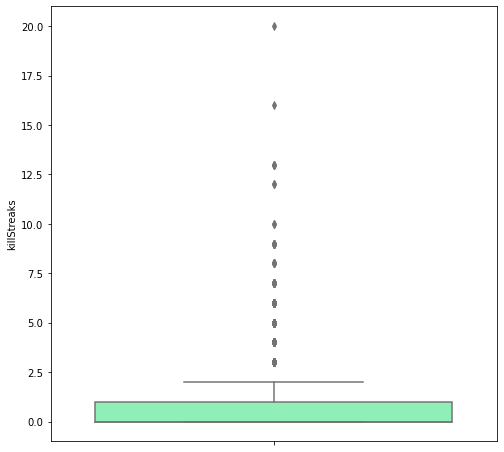

In [133]:
# plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['killStreaks'],palette='rainbow')

In [134]:
streak_outliers=iqr(data['killStreaks'])

Lower limit:  -1.5
Upper limit:  2.5


In [135]:
data['killStreaks']=data[(data['killStreaks']>-1.5) & (data['killStreaks']<2.5)]

In [136]:
data['killStreaks'].isnull().sum()

13391

In [137]:
data['killStreaks'].fillna(data['killStreaks'].median(),inplace=True)

In [138]:
data['killStreaks'].isnull().sum()

0

<AxesSubplot:ylabel='killStreaks'>

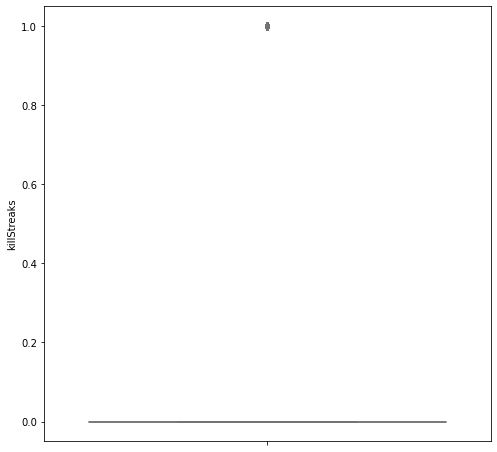

In [139]:
# plotting the boxplot after cleaning

plt.figure(figsize=(8,8))
sns.boxplot(y=data['killStreaks'],palette='rainbow')

There are no outliers after cleaning the data

<Figure size 576x576 with 0 Axes>

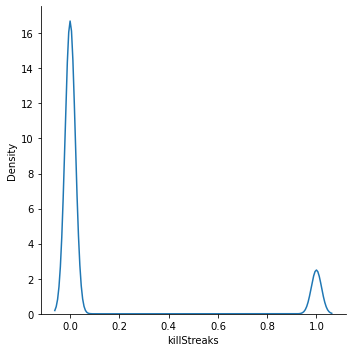

In [140]:
#plotting the displot after cleaing the data

plt.figure(figsize=(8,8))
sns.displot(x=data['killStreaks'],kind='kde',palette='rainbow')

### Analysing the longest kill

- Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

In [141]:
data['longestKill'].describe()

count   1111742.000
mean         22.998
std          51.070
min           0.000
25%           0.000
50%           0.000
75%          21.330
max        1040.000
Name: longestKill, dtype: float64

In [142]:
data['longestKill'].unique().shape

(24433,)

<Figure size 576x576 with 0 Axes>

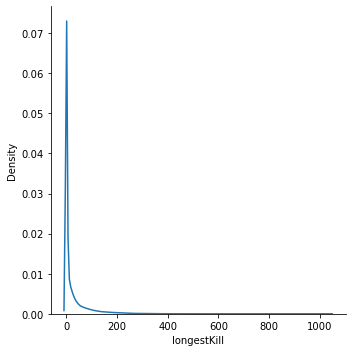

In [143]:
#plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['longestKill'],palette='rainbow',kind='kde')

- Most of the people have longestKill between 0 and 180
- % of people that are killed at zero point distance are 57.06422893081309%
- Maximum distance between a kill is 1040.0
- Maximum distance between a kill is 1040.0 and is done by 1 people

In [144]:
longest_0=data['longestKill'].value_counts()[0]/data['longestKill'].shape[0]*100
print(f"% of people that are kill at zero point distance are {longest_0}%")
print(f"Maximum distance between a kill is {data['longestKill'].max()} and is done by {data['longestKill'].value_counts()[data['longestKill'].max()]} people")

% of people that are kill at zero point distance are 57.06422893081309%
Maximum distance between a kill is 1040.0 and is done by 1 people


<AxesSubplot:ylabel='longestKill'>

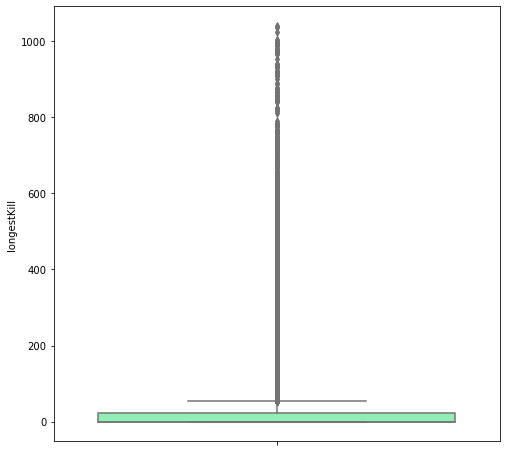

In [145]:
#plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['longestKill'],palette='rainbow')

- Values above 53.324999999999996 and below -31.994999999999997 are outliers 

In [146]:
longest_outlier=iqr(data['longestKill'])

Lower limit:  -31.994999999999997
Upper limit:  53.324999999999996


In [147]:
#Removing outliers

data['longestKill']=data[(data['longestKill']>-31.994999999999997) & (data['longestKill']< 53.324999999999996)]

In [148]:
data['longestKill'].isnull().sum()

153335

In [149]:
data['longestKill'].fillna(data['longestKill'].mean(),inplace=True)

In [150]:
data['longestKill'].isnull().sum()

0

<AxesSubplot:ylabel='longestKill'>

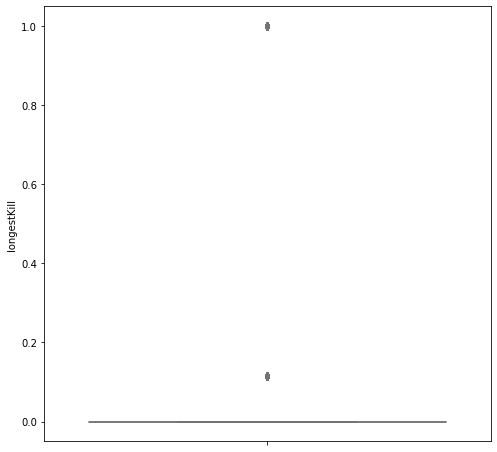

In [151]:
#plotting the boxplot after cleaning the data

plt.figure(figsize=(8,8))
sns.boxplot(y=data['longestKill'],palette='rainbow')

Now we can see that there are no outliers

<Figure size 576x576 with 0 Axes>

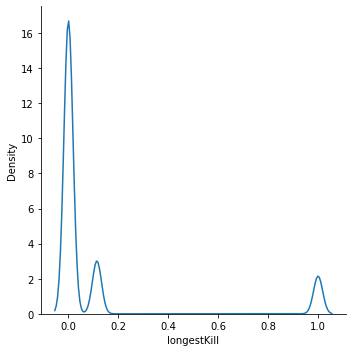

In [152]:
#plotting the displot after the outliers

plt.figure(figsize=(8,8))
sns.displot(x=data['longestKill'],palette='rainbow',kind='kde')

### Analysing matchDuration
- Duration of match in seconds.

In [153]:
data['matchDuration'].describe()

count   1111742.000
mean       1579.348
std         258.935
min           9.000
25%        1367.000
50%        1438.000
75%        1851.000
max        2237.000
Name: matchDuration, dtype: float64

In [154]:
data['matchDuration'].unique().shape

(1263,)

<Figure size 576x576 with 0 Axes>

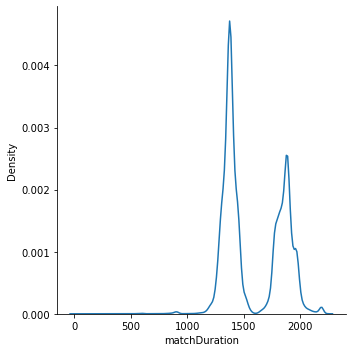

In [155]:
#Plotting the displot

plt.figure(figsize=(8,8))
sns.displot(x=data['matchDuration'],kind='kde',palette='rainbow')

- Maximum match are palyed between the duration of 1200-1600 and 1700-2200
- Minumum duration of a match is 9
- Number of matches palyed with minimum duration is 1
- Minumum duration of a match is 2237
- Number of matches palyed with minimum duration is 21
- Average duration of a match is 1579.347832500706

In [156]:
print(f"Minumum duration of a match is {data['matchDuration'].min()}")
print(f"Number of matches palyed with minimum duration is {data['matchDuration'].value_counts()[data['matchDuration'].min()]}")
print(f"Minumum duration of a match is {data['matchDuration'].max()}")
print(f"Number of matches palyed with minimum duration is {data['matchDuration'].value_counts()[data['matchDuration'].max()]}")
print(f"Average duration of a match is {data['matchDuration'].mean()}")

Minumum duration of a match is 9
Number of matches palyed with minimum duration is 1
Minumum duration of a match is 2237
Number of matches palyed with minimum duration is 21
Average duration of a match is 1579.347832500706


<AxesSubplot:ylabel='matchDuration'>

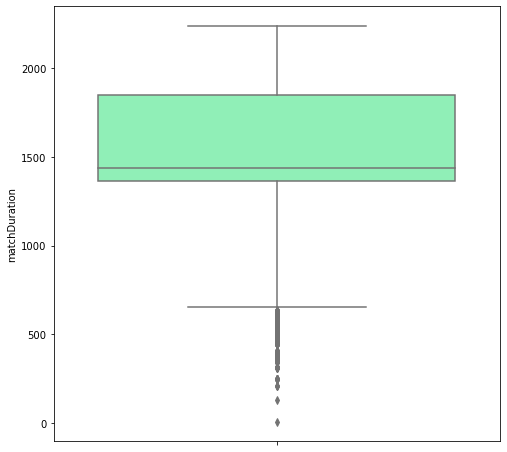

In [157]:
#Plotting the boxplot

plt.figure(figsize=(8,8))
sns.boxplot(y=data['matchDuration'],palette='rainbow')

- Values below  641.0 and above 2577.0 are outliers

In [158]:
duration_outlier=iqr(data['matchDuration'])

Lower limit:  641.0
Upper limit:  2577.0


In [159]:
#Removing outliers

data['matchDuration']=data[(data['matchDuration']>641.0) & (data['matchDuration']<2577.0)]

In [160]:
data['matchDuration'].isnull().sum()

700

In [161]:
data['matchDuration'].fillna(data['matchDuration'].mean(),inplace=True)

<AxesSubplot:ylabel='matchDuration'>

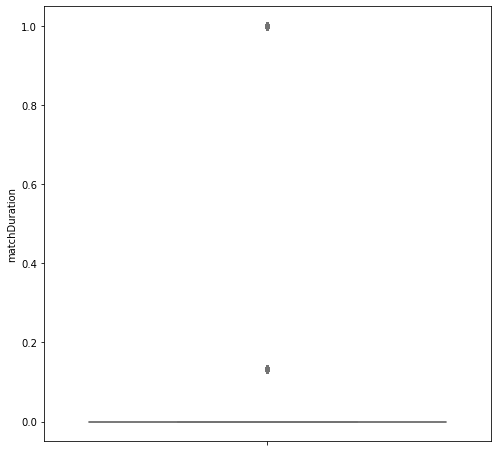

In [162]:
#Plotting the boxplot after cleaning the data

plt.figure(figsize=(8,8))
sns.boxplot(y=data['matchDuration'],palette='rainbow')

There are no outliers after cleaning the data

<Figure size 576x576 with 0 Axes>

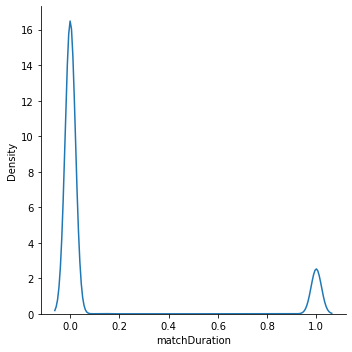

In [163]:
#Plotting the displot after cleaning the data

plt.figure(figsize=(8,8))
sns.displot(x=data['matchDuration'],kind='kde',palette='rainbow')

### Analysing matchType

- String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

In [164]:
data['matchType'].describe()

count       1111742
unique           16
top       squad-fpp
freq         438781
Name: matchType, dtype: object

In [165]:
data['matchType'].unique()

array(['squad-fpp', 'solo-fpp', 'solo', 'duo', 'duo-fpp', 'squad',
       'normal-squad-fpp', 'normal-duo-fpp', 'normal-solo-fpp',
       'crashfpp', 'crashtpp', 'normal-squad', 'flaretpp', 'flarefpp',
       'normal-duo', 'normal-solo'], dtype=object)

In [166]:
data['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

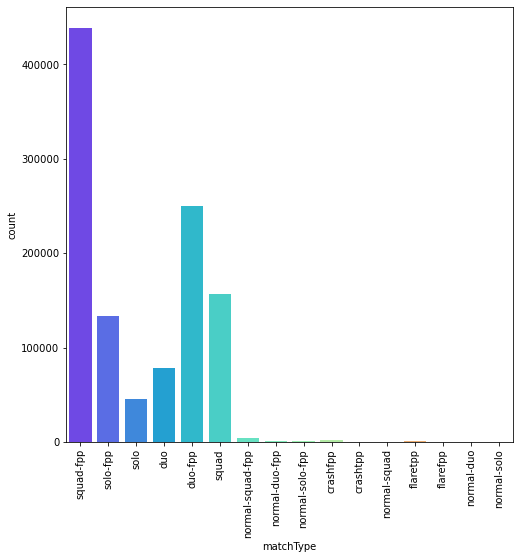

In [167]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['matchType'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

- Mostly people play squad-fpp, solo-fpp,duo-fpp and squad
- % of people that play squad-fpp are 39.46788013765784 %
- % of people that play duo-fpp are 22.48066547814151 %
- % of people that play squad are 14.083573347053543 %
- % of people that play solo-fpp are 12.040023674557586 %

In [168]:
squad_fpp=data['matchType'].value_counts()['squad-fpp']/data['matchType'].shape[0]*100
solo_fpp=data['matchType'].value_counts()['solo-fpp']/data['matchType'].shape[0]*100
duo_fpp=data['matchType'].value_counts()['duo-fpp']/data['matchType'].shape[0]*100
squad=data['matchType'].value_counts()['squad']/data['matchType'].shape[0]*100
print(f"% of people that play squad-fpp are {squad_fpp} %")
print(f"% of people that play solo-fpp are {solo_fpp} %")
print(f"% of people that play duo-fpp are {duo_fpp} %")
print(f"% of people that play squad are {squad} %")

% of people that play squad-fpp are 39.46788013765784 %
% of people that play solo-fpp are 12.040023674557586 %
% of people that play duo-fpp are 22.48066547814151 %
% of people that play squad are 14.083573347053543 %


### Analysing numGroups

- Number of groups we have data for in the match.

In [169]:
data['numGroups'].describe()

count   1111742.000
mean         43.007
std          23.278
min           1.000
25%          27.000
50%          30.000
75%          47.000
max         100.000
Name: numGroups, dtype: float64

In [170]:
data['numGroups'].unique().shape

(100,)

In [171]:
data['numGroups'].value_counts()

27     133991
28     122409
26     103974
29      78808
47      67667
25      60551
46      59323
48      52658
45      46588
30      35651
44      29543
49      27061
24      25572
94      24167
93      21874
95      21521
92      19274
43      18117
96      16945
31      13961
91      13748
90      11656
97      11592
23       9722
42       9638
89       8676
50       6012
88       5779
98       5599
41       4894
32       4743
22       3583
87       3475
40       2876
86       2198
99       1940
16       1788
85       1736
39       1699
2        1645
33       1596
21       1254
84       1167
83        931
38        850
20        780
15        721
34        690
82        590
37        549
18        525
12        462
6         454
8         454
78        431
79        410
13        409
19        406
80        401
36        389
14        346
17        344
35        328
81        320
76        317
1         302
7         298
74        247
10        245
11        245
73        203
75    

<AxesSubplot:xlabel='numGroups', ylabel='count'>

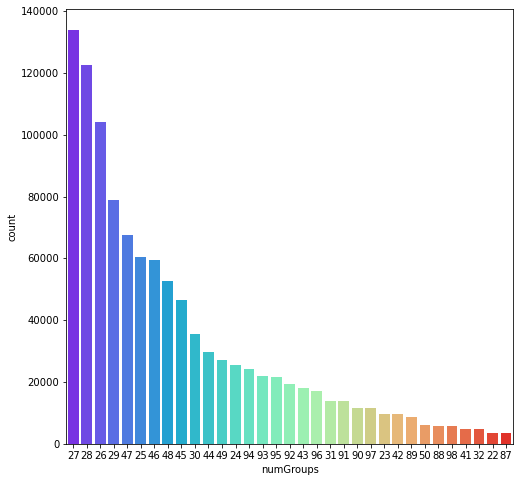

In [172]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['numGroups'],palette='rainbow',order=data['numGroups'].value_counts().iloc[:33].index)

<AxesSubplot:xlabel='numGroups', ylabel='count'>

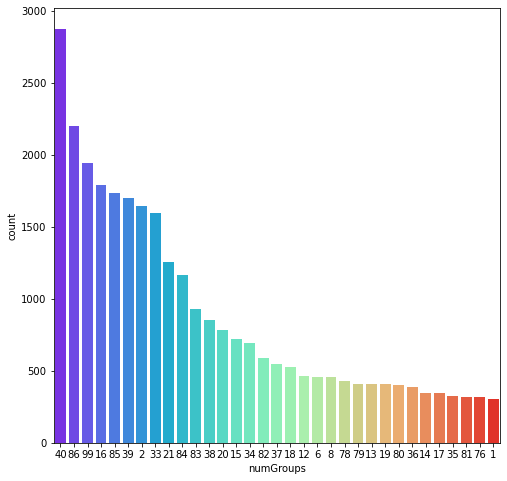

In [173]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['numGroups'],palette='rainbow',order=data['numGroups'].value_counts().iloc[33:66].index)

<AxesSubplot:xlabel='numGroups', ylabel='count'>

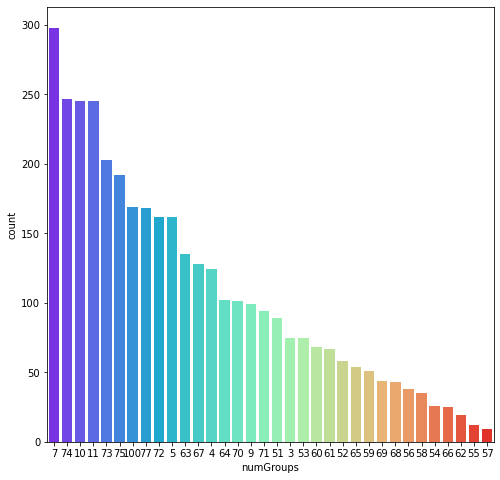

In [174]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['numGroups'],palette='rainbow',order=data['numGroups'].value_counts().iloc[66:].index)

- Maximum group formed in a match are 27 followed by 28 and 26
- % of 27, 28 and 26 group formed in a match are 32.41525461842765%

In [175]:
group_27=data['numGroups'].value_counts()[27]/data['numGroups'].shape[0]*100
group_28=data['numGroups'].value_counts()[28]/data['numGroups'].shape[0]*100
group_26=data['numGroups'].value_counts()[26]/data['numGroups'].shape[0]*100
print(f" % of 27, 28 and 26 group formed in a match are {group_27+group_26+group_28}%")

 % of 27, 28 and 26 group formed in a match are 32.41525461842765%


<Figure size 576x576 with 0 Axes>

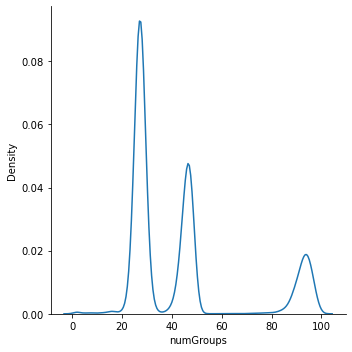

In [176]:
plt.figure(figsize=(8,8))
sns.displot(x=data['numGroups'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='numGroups'>

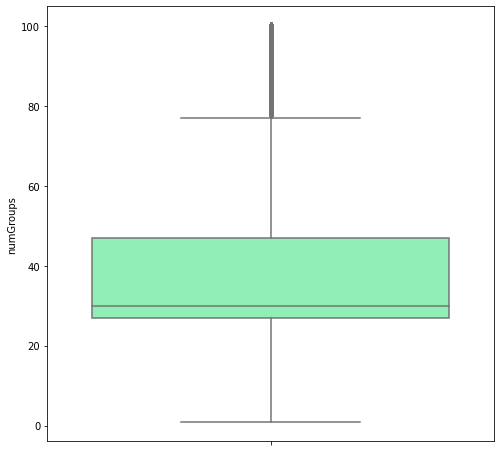

In [177]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['numGroups'],palette='rainbow')

Above 77 all the value are outliers.

In [178]:
group=iqr(data['numGroups'])

Lower limit:  -3.0
Upper limit:  77.0


In [179]:
data['numGroups']=data[(data['numGroups']>-3) &(data['numGroups']<77)]

In [180]:
data['numGroups'].fillna(data['numGroups'].median(),inplace=True)

In [181]:
data['numGroups'].isnull().sum()

0

<AxesSubplot:ylabel='numGroups'>

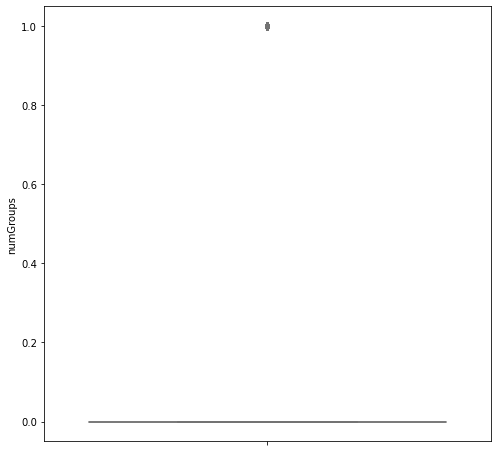

In [182]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['numGroups'],palette='rainbow')

Now, there are no outliers after cleaning the data.

<Figure size 576x576 with 0 Axes>

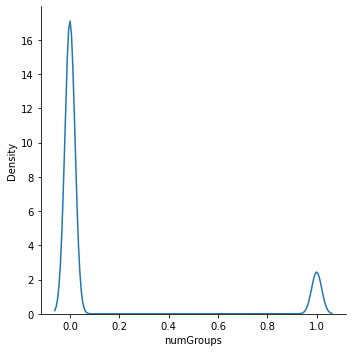

In [183]:
plt.figure(figsize=(8,8))
sns.displot(x=data['numGroups'],palette='rainbow',kind='kde')

Displot after cleaning the data

### Analysing rankPoints
- Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.

In [184]:
data['rankPoints'].describe()

count   1111742.000
mean        892.790
std         736.644
min          -1.000
25%          -1.000
50%        1444.000
75%        1500.000
max        5910.000
Name: rankPoints, dtype: float64

In [185]:
data['rankPoints'].unique().shape

(1707,)

<Figure size 576x576 with 0 Axes>

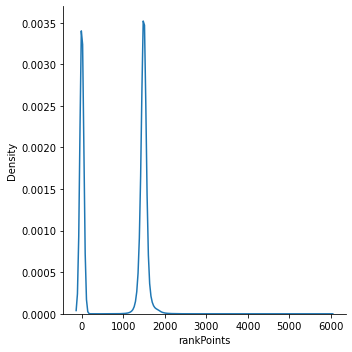

In [186]:
plt.figure(figsize=(8,8))
sns.displot(x=data['rankPoints'],palette='rainbow',kind='kde')

- Most of the player have rank point bwtween 0-100 and 1000-2000
- % of player having -1 or None rank points are 38.23063264678316%
- Maximum rank point is 5910 and is obtained by 1 person

In [187]:
rank_none=data['rankPoints'].value_counts()[-1]/data['rankPoints'].shape[0]*100
print(f"% of player having -1 or None rank points are {rank_none}%")
print(f"Maximum rank point is {data['rankPoints'].max()} and is obtained by {data['rankPoints'].value_counts()[data['rankPoints'].max()]} person")

% of player having -1 or None rank points are 38.23063264678316%
Maximum rank point is 5910 and is obtained by 1 person


<AxesSubplot:ylabel='rankPoints'>

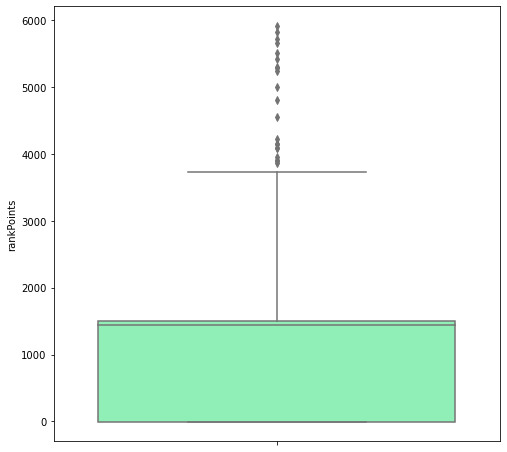

In [188]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['rankPoints'],palette='rainbow')

There are outliers above 3751.5

In [189]:
rankp_outliers=iqr(data['rankPoints'])

Lower limit:  -2252.5
Upper limit:  3751.5


In [190]:
data['rankPoints']=data[(data['rankPoints']>-2252.5) & (data['rankPoints']<3751.5)]

In [191]:
data['rankPoints'].fillna(data['rankPoints'].median(),inplace=True)

<AxesSubplot:ylabel='rankPoints'>

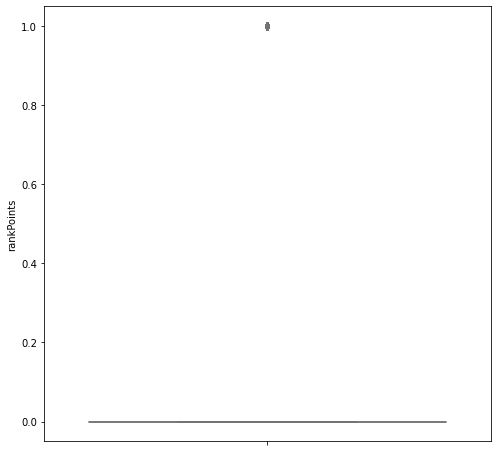

In [192]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['rankPoints'],palette='rainbow')

After cleaning, we can see that there are no outliers.

<Figure size 576x576 with 0 Axes>

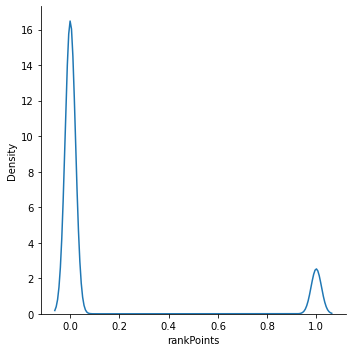

In [193]:
# Displot after cleaning the data

plt.figure(figsize=(8,8))
sns.displot(x=data['rankPoints'],palette='rainbow',kind='kde')

### Analysing revives
- Number of times this player revived teammates.

In [194]:
data['revives'].describe()

count   1111742.000
mean          0.164
std           0.470
min           0.000
25%           0.000
50%           0.000
75%           0.000
max          23.000
Name: revives, dtype: float64

In [195]:
data['revives'].unique()

array([ 0,  1,  2,  3,  4,  7,  5, 10,  6, 17,  9, 12, 15, 23, 13, 11, 14,
        8, 18, 16], dtype=int64)

In [196]:
data['revives'].value_counts()

0     965397
1     117166
2      23775
3       4388
4        776
5        148
6         37
7         14
10         9
8          8
11         5
15         4
9          3
12         3
14         2
16         2
17         2
18         1
13         1
23         1
Name: revives, dtype: int64

<AxesSubplot:xlabel='revives', ylabel='count'>

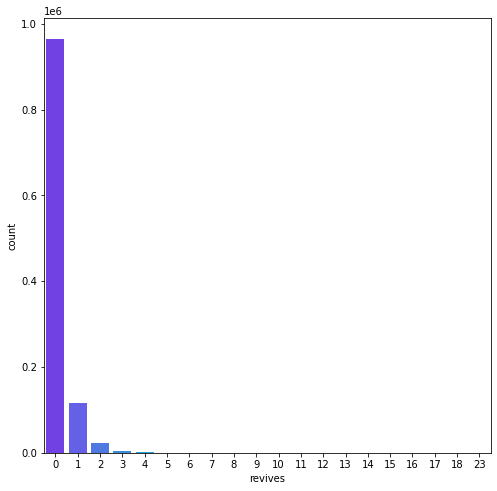

In [197]:
#plotting the countplot

plt.figure(figsize=(8,8))
sns.countplot(x=data['revives'],palette='rainbow')

- From graph we can see that maximum time no reive is given to the team mates.
- % of time no revive is given is 86.83642427829479%
- % of time 1 revive given is 10.538955980794105%
- Maximum revives given by any player to his temmates are 23

In [198]:
revive_0=data['revives'].value_counts()[0]/data['revives'].shape[0]*100
revive_1=data['revives'].value_counts()[1]/data['revives'].shape[0]*100
print(f"% of time no revive is given is {revive_0}%")
print(f"% of time 1 revive given is {revive_1}%")

% of time no revive is given is 86.83642427829479%
% of time 1 revive given is 10.538955980794105%


<Figure size 576x576 with 0 Axes>

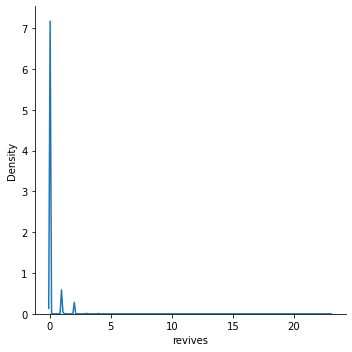

In [199]:
plt.figure(figsize=(8,8))
sns.displot(x=data['revives'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='revives'>

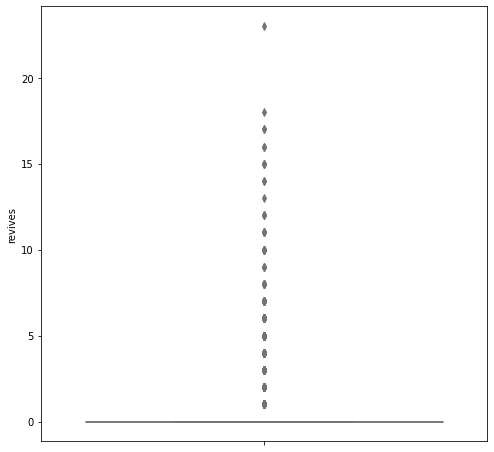

In [200]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['revives'],palette='rainbow')

In [201]:
revive_outliers=iqr(data['revives'])

Lower limit:  0.0
Upper limit:  0.0


In [202]:
data['revives']=data[data['revives']<1]

In [203]:
data['revives'].isnull().sum()

146345

In [204]:
data['revives'].fillna(data['revives'].median(),inplace=True)

<AxesSubplot:ylabel='revives'>

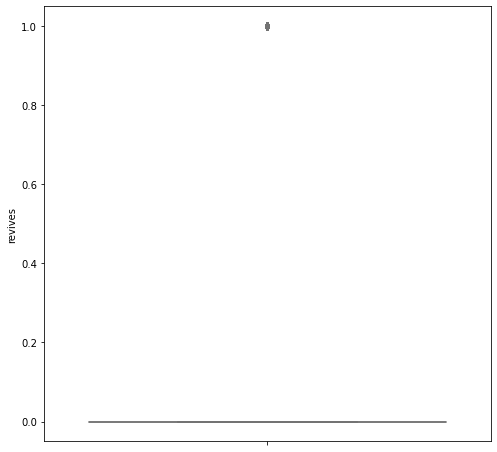

In [205]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['revives'],palette='rainbow')

Now, after cleaning the data there are no outliers in the data

<Figure size 576x576 with 0 Axes>

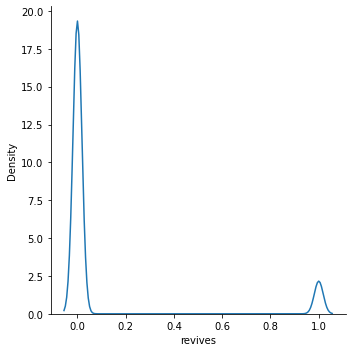

In [206]:
plt.figure(figsize=(8,8))
sns.displot(x=data['revives'],palette='rainbow',kind='kde')

### Analysing rideDistance
- Total distance traveled in vehicles measured in meters.

In [207]:
data['rideDistance'].describe()

count   1111742.000
mean        604.214
std        1495.949
min           0.000
25%           0.000
50%           0.000
75%           0.079
max       35400.000
Name: rideDistance, dtype: float64

In [208]:
data['rideDistance'].unique().shape

(24564,)

<Figure size 576x576 with 0 Axes>

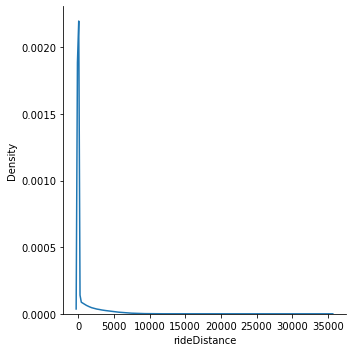

In [209]:
plt.figure(figsize=(8,8))
sns.displot(x=data['rideDistance'],palette='rainbow',kind='kde')

- The range of distance travelled by mximum palyer is 0-5300
- The mean distance travelled is 604.2142157227097
- The minimum distance traveled is 0.0
- The maximum distance traveled is 35400.0
- % of people who travelled 0 distance are 74.43930336355018%

In [210]:
print(f"The mean distance travelled is {data['rideDistance'].mean()}")
print(f"The minimum distance traveled is {data['rideDistance'].min()}")
print(f"The maximum distance traveled is {data['rideDistance'].max()}")
travelled_0=data['rideDistance'].value_counts()[0]/data['rideDistance'].shape[0]*100
print(f"% of people who travelled 0 distance are {travelled_0}%")

The mean distance travelled is 604.2142157227097
The minimum distance traveled is 0.0
The maximum distance traveled is 35400.0
% of people who travelled 0 distance are 74.43930336355018%


<AxesSubplot:ylabel='rideDistance'>

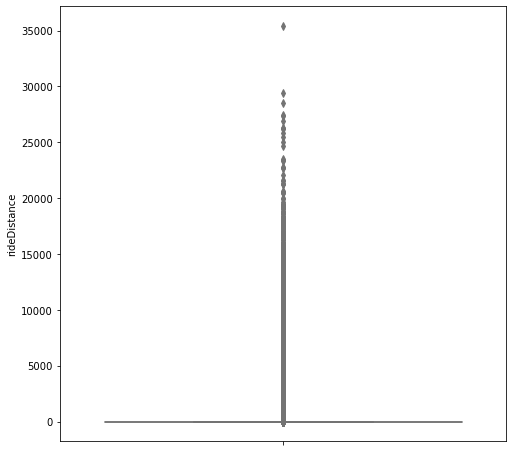

In [211]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['rideDistance'],palette='rainbow')

Values above 0.19818750000000002 and below -0.1189125 are outliers

In [212]:
rideD_outlier=iqr(data['rideDistance'])

Lower limit:  -0.1189125
Upper limit:  0.19818750000000002


In [213]:
data['rideDistance']=data[(data['rideDistance']>-0.1189125) & (data['rideDistance']<0.19818750000000002)]

In [214]:
data['rideDistance'].isnull().sum()

277645

In [215]:
data['rideDistance'].fillna(data['rideDistance'].median(),inplace=True)

<AxesSubplot:ylabel='rideDistance'>

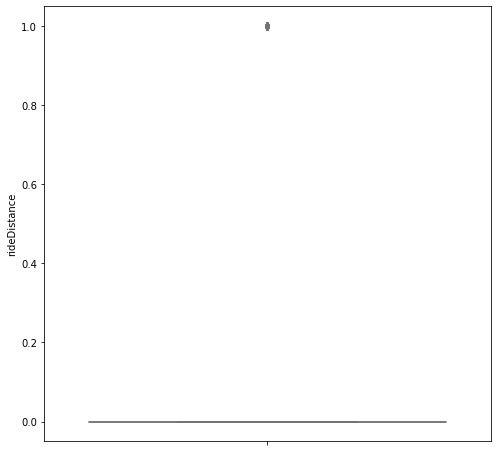

In [216]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['rideDistance'],palette='rainbow')

Now there are no outliers after cleaning the rideDistance data

<Figure size 576x576 with 0 Axes>

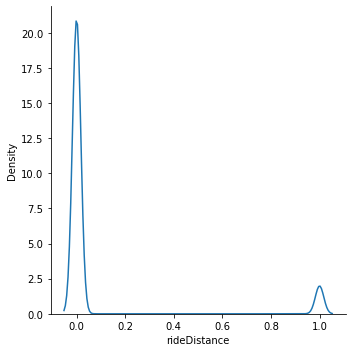

In [217]:
plt.figure(figsize=(8,8))
sns.displot(x=data['rideDistance'],palette='rainbow',kind='kde')

### Analysing roadKills
- Number of kills while in a vehicle.

In [218]:
data['roadKills'].describe()

count   1111742.000
mean          0.004
std           0.074
min           0.000
25%           0.000
50%           0.000
75%           0.000
max          14.000
Name: roadKills, dtype: float64

In [219]:
data['roadKills'].unique()

array([ 0,  2,  1,  9,  3,  7,  6, 14,  5,  4,  8], dtype=int64)

In [220]:
data['roadKills'].value_counts()

0     1108451
1        2835
2         341
3          76
4          19
5           8
6           7
7           2
14          1
9           1
8           1
Name: roadKills, dtype: int64

<AxesSubplot:xlabel='roadKills', ylabel='count'>

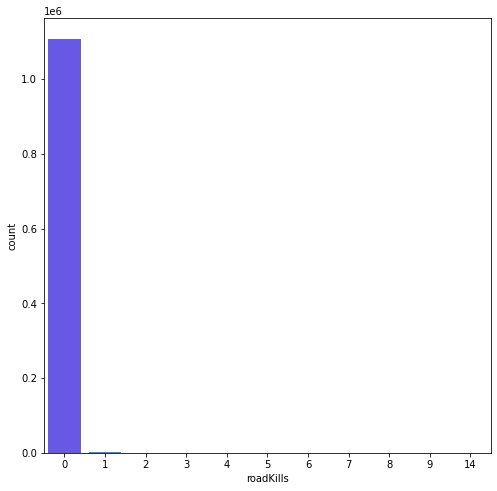

In [221]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['roadKills'],palette='rainbow')

- Maximum time there were zero roadKill
- % of 0 roadkills are 99.70397808124547%
- Maximum number of kill in a vehicle is 14 by 1 person.

In [222]:
roadK_0=data['roadKills'].value_counts()[0]/data['roadKills'].shape[0]*100
print(f" % of 0 roadkills are {roadK_0}%")
print(f"Maximum kills of 14 is by {data['roadKills'].value_counts()[data['roadKills'].max()]} person")

 % of 0 roadkills are 99.70397808124547%
Maximum kills of 14 is by 1 person


<Figure size 576x576 with 0 Axes>

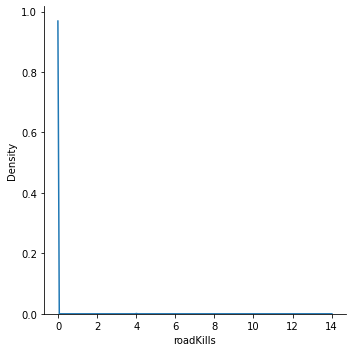

In [223]:
plt.figure(figsize=(8,8))
sns.displot(x=data['roadKills'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='roadKills'>

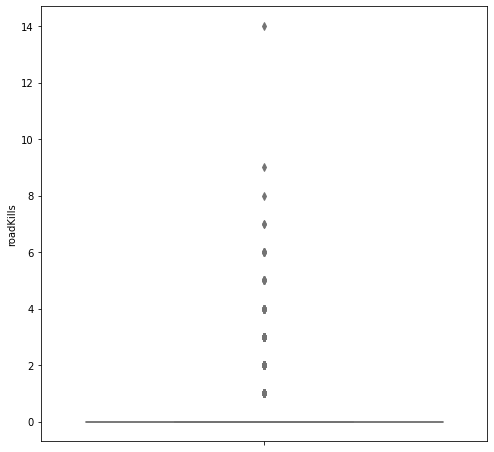

In [224]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['roadKills'],palette='rainbow')

In [225]:
road_kill_outlier=iqr(data['roadKills'])

Lower limit:  0.0
Upper limit:  0.0


In [226]:
data['roadKills']=data[(data['roadKills']<1)]

In [227]:
data['roadKills'].isnull().sum()

3291

In [228]:
data['roadKills'].fillna(data['roadKills'].median(),inplace=True)

<AxesSubplot:ylabel='roadKills'>

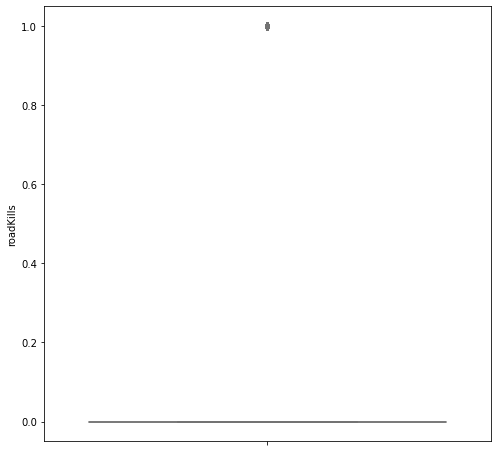

In [229]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['roadKills'],palette='rainbow')

Now there are no outliers after cleaning roadKills

<Figure size 576x576 with 0 Axes>

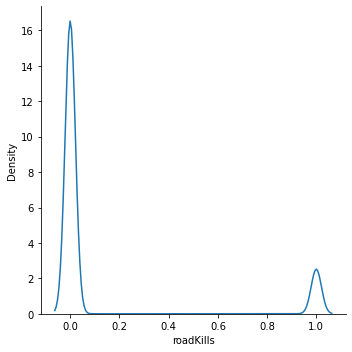

In [230]:
# Displots after cleaning roadKills

plt.figure(figsize=(8,8))
sns.displot(x=data['roadKills'],palette='rainbow',kind='kde')

### Analysing swimDistance

- Total distance traveled by swimming measured in meters.

In [231]:
data['swimDistance'].describe()

count   1111742.000
mean          4.545
std          30.619
min           0.000
25%           0.000
50%           0.000
75%           0.000
max        2668.000
Name: swimDistance, dtype: float64

In [232]:
data['swimDistance'].unique().shape

(20702,)

<Figure size 576x576 with 0 Axes>

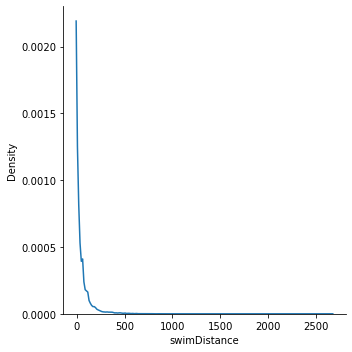

In [233]:
plt.figure(figsize=(8,8))
sns.displot(x=data['swimDistance'],palette='rainbow',kind='kde')

- From graph it is clear that most of the peope have travelled zero distace
- % of people who swimmed 0 distance are 93.46817876809548% 
- Maximum distance travelled by person is 2668
- Mean distance is 4.5450684734407725

In [234]:
swim_0=data['swimDistance'].value_counts()[0]/data['swimDistance'].shape[0]*100
print(f" % of people who swimmed 0 distance are {swim_0}% ")
print(f"Mean swim distance is {data['swimDistance'].mean()}")

 % of people who swimmed 0 distance are 93.46817876809548% 
Mean swim distance is 4.5450684734407725


<AxesSubplot:ylabel='swimDistance'>

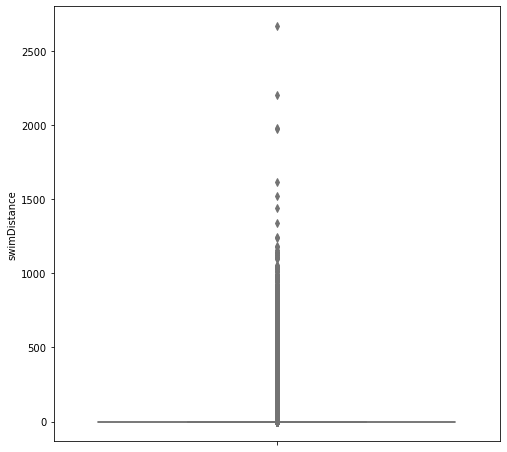

In [235]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['swimDistance'],palette='rainbow')

In [236]:
swim_outliers=iqr(data['swimDistance'])

Lower limit:  0.0
Upper limit:  0.0


In [237]:
data['swimDistance']=data[(data['swimDistance']<1)]

In [238]:
data['swimDistance'].isnull().sum()

70945

In [239]:
data['swimDistance'].fillna(data['swimDistance'].mean(),inplace=True)

<AxesSubplot:ylabel='swimDistance'>

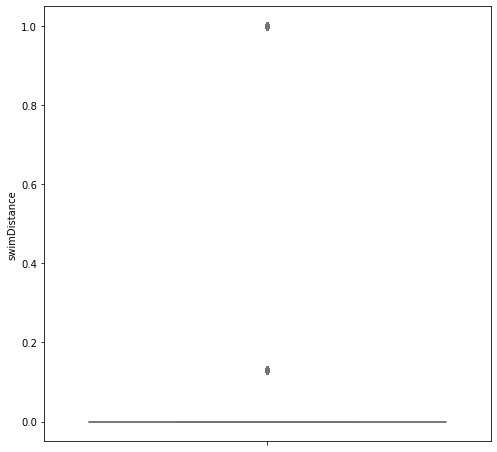

In [240]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['swimDistance'],palette='rainbow')

Now there are no outliers after cleaning hte swinDistance column

<Figure size 576x576 with 0 Axes>

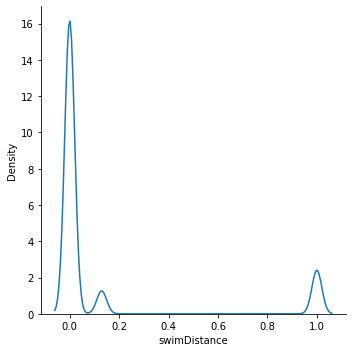

In [241]:
plt.figure(figsize=(8,8))
sns.displot(x=data['swimDistance'],palette='rainbow',kind='kde')

### Analysing teamKills 
- Number of times this player killed a teammate.

In [242]:
 data['teamKills'].describe()

count   1111742.000
mean          0.024
std           0.168
min           0.000
25%           0.000
50%           0.000
75%           0.000
max          10.000
Name: teamKills, dtype: float64

In [243]:
data['teamKills'].unique()

array([ 0,  1,  2,  3,  4,  5, 10], dtype=int64)

In [244]:
data['teamKills'].value_counts()

0     1087355
1       22353
2        1799
3         206
4          25
5           3
10          1
Name: teamKills, dtype: int64

<AxesSubplot:xlabel='teamKills', ylabel='count'>

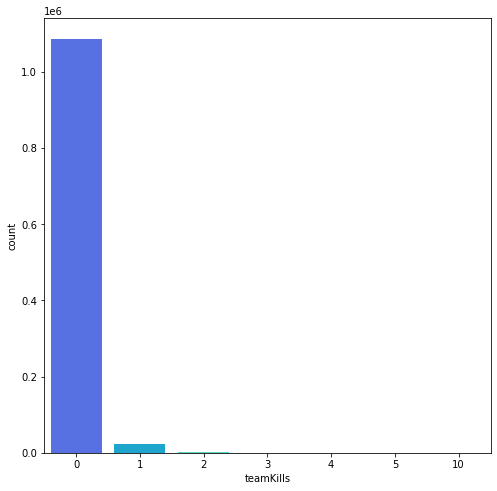

In [245]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['teamKills'],palette='rainbow')

- There are very rare chance that anyone killed his own teammate
- % of time when no teammate was killed is 97.8064155172693%
- Maximum numbe of times a teammate was killed is 10

In [246]:
teamate_0=data['teamKills'].value_counts()[0]/data['teamKills'].shape[0]*100
print(f" % of time when no teammate was killed is {teamate_0}%")

 % of time when no teammate was killed is 97.8064155172693%


<Figure size 576x576 with 0 Axes>

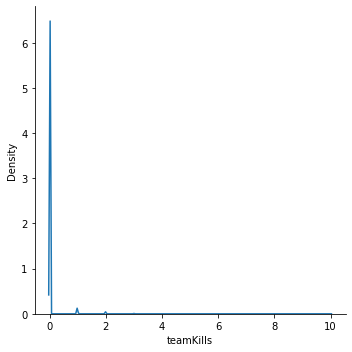

In [247]:
plt.figure(figsize=(8,8))
sns.displot(x=data['teamKills'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='teamKills'>

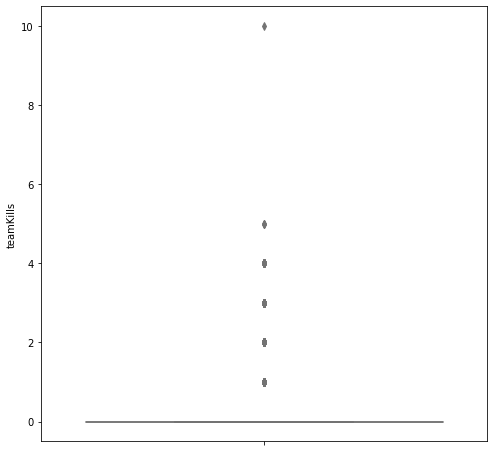

In [248]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['teamKills'],palette='rainbow')

In [249]:
temmate_outlier=iqr(data['teamKills'])

Lower limit:  0.0
Upper limit:  0.0


In [250]:
data['teamKills']=data[(data['teamKills']<1)]

In [251]:
data['teamKills'].isnull().sum()

24387

In [252]:
data['teamKills'].fillna(data['teamKills'].median(),inplace=True)

<AxesSubplot:ylabel='teamKills'>

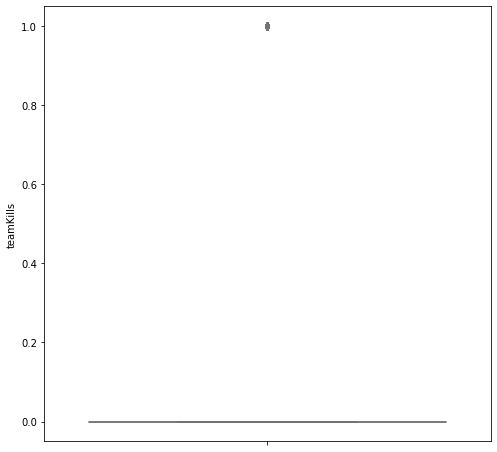

In [253]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['teamKills'],palette='rainbow')

Now there are no outliers after cleaning the teamKills column

<Figure size 576x576 with 0 Axes>

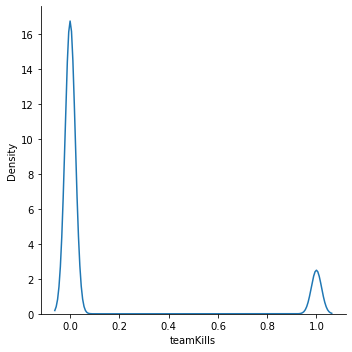

In [254]:
plt.figure(figsize=(8,8))
sns.displot(x=data['teamKills'],palette='rainbow',kind='kde')

### Analysing vehicleDestroys
- Number of vehicles destroyed.

In [255]:
data['vehicleDestroys'].describe()

count   1111742.000
mean          0.008
std           0.092
min           0.000
25%           0.000
50%           0.000
75%           0.000
max           5.000
Name: vehicleDestroys, dtype: float64

In [256]:
data['vehicleDestroys'].unique()

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [257]:
data['vehicleDestroys'].value_counts()

0    1103376
1       8054
2        285
3         24
4          2
5          1
Name: vehicleDestroys, dtype: int64

<AxesSubplot:xlabel='vehicleDestroys', ylabel='count'>

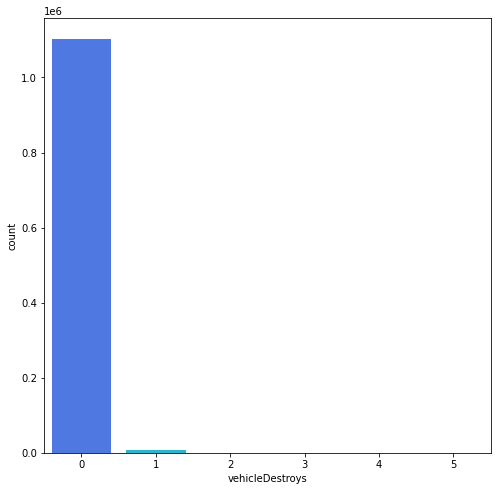

In [258]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['vehicleDestroys'],palette='rainbow')

- From graph it is clear that usually no vehicles were destroyed
- % of times no vehice were destroyed is 99.24748727672427%
- Only 1 time, maximum of 5 vehicle were destroyed

In [259]:
destroy_0=data['vehicleDestroys'].value_counts()[0]/data['vehicleDestroys'].shape[0]*100
print(f" % of times no vehice were destroyed is {destroy_0}%")

 % of times no vehice were destroyed is 99.24748727672427%


<Figure size 576x576 with 0 Axes>

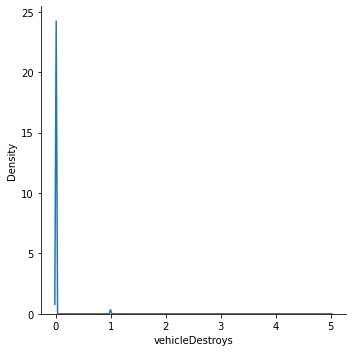

In [260]:
plt.figure(figsize=(8,8))
sns.displot(x=data['vehicleDestroys'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='vehicleDestroys'>

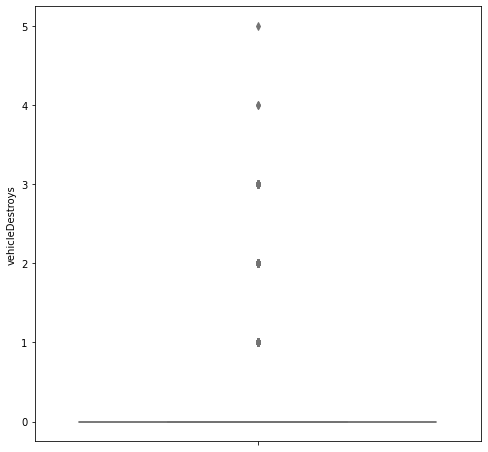

In [261]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['vehicleDestroys'],palette='rainbow')

In [262]:
vehicleD=iqr(data['vehicleDestroys'])

Lower limit:  0.0
Upper limit:  0.0


In [263]:
data['vehicleDestroys']=data[(data['vehicleDestroys']<1)]

In [264]:
data['vehicleDestroys'].isnull().sum()

8366

In [265]:
data['vehicleDestroys'].fillna(data['vehicleDestroys'].median(),inplace=True)

In [266]:
data['vehicleDestroys'].isnull().sum()

0

<AxesSubplot:ylabel='vehicleDestroys'>

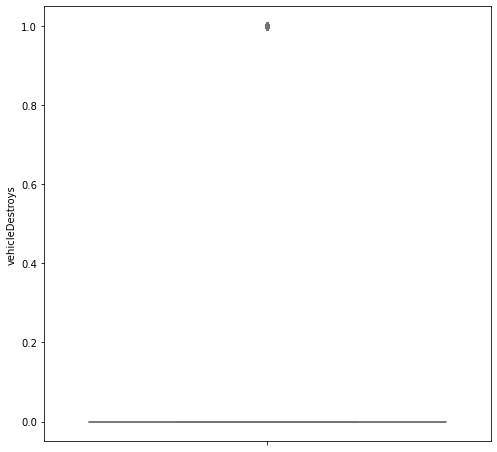

In [267]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['vehicleDestroys'],palette='rainbow')

Now there are no outliers after cleaning vehicleDestroys

<Figure size 576x576 with 0 Axes>

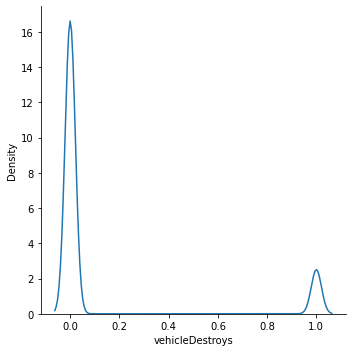

In [268]:
plt.figure(figsize=(8,8))
sns.displot(x=data['vehicleDestroys'],palette='rainbow',kind='kde')

### Analysing walkDistance
- Total distance traveled on foot measured in meters.

In [269]:
data['walkDistance'].describe()

count   1111742.000
mean       1153.282
std        1182.788
min           0.000
25%         155.200
50%         684.100
75%        1975.000
max       13960.000
Name: walkDistance, dtype: float64

In [270]:
data['walkDistance'].unique().shape

(32651,)

<Figure size 576x576 with 0 Axes>

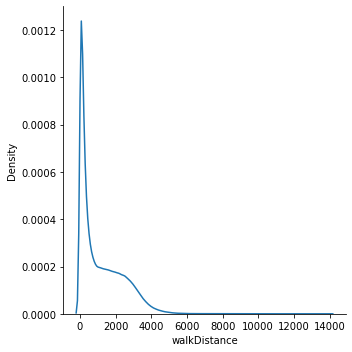

In [271]:
plt.figure(figsize=(8,8))
sns.displot(x=data['walkDistance'],palette='rainbow',kind='kde')

- Generally, the walk distance of people is 0-4200
- Maximum distance walked by any perosn is 13960.000
- Mean distance walked is 1153.282

<AxesSubplot:ylabel='walkDistance'>

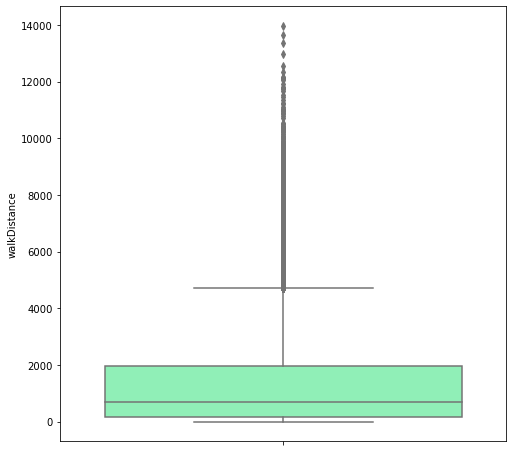

In [272]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['walkDistance'],palette='rainbow')

In [273]:
walk_outliers=iqr(data['walkDistance'])

Lower limit:  -2574.5
Upper limit:  4704.7


In [274]:
data['walkDistance']=data[(data['walkDistance']>-2574.5) & (data['walkDistance']<4704.7)]

In [275]:
data['walkDistance'].isnull().sum()

6757

In [276]:
data['walkDistance'].fillna(data['walkDistance'].median(),inplace=True)

<AxesSubplot:ylabel='walkDistance'>

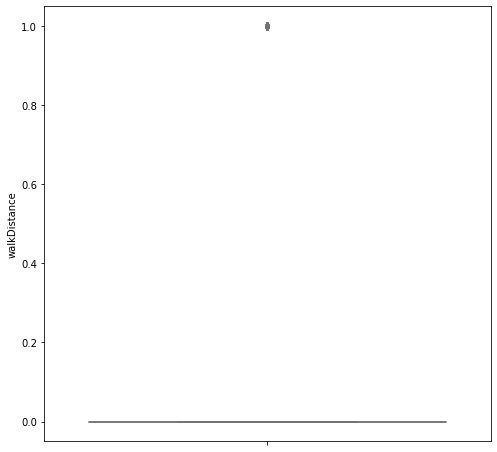

In [277]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['walkDistance'],palette='rainbow')

Now there are no outliers after cleaning walkDistance

<Figure size 576x576 with 0 Axes>

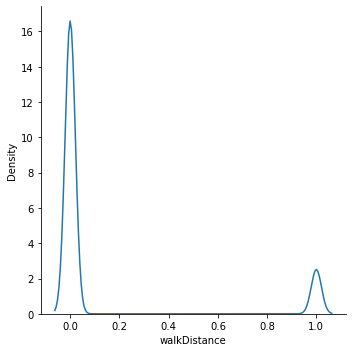

In [278]:
plt.figure(figsize=(8,8))
sns.displot(x=data['walkDistance'],palette='rainbow',kind='kde')

### Analysing  weaponsAcquired
- Number of weapons picked up.

In [279]:
data['weaponsAcquired'].describe()

count   1111742.000
mean          3.660
std           2.462
min           0.000
25%           2.000
50%           3.000
75%           5.000
max         177.000
Name: weaponsAcquired, dtype: float64

In [280]:
data['weaponsAcquired'].unique()

array([  1,   7,   0,   5,   3,   2,   4,   6,  30,   8,  11,   9,  10,
        12,  19,  13,  14,  24,  21,  27,  28,  18,  20,  22,  25,  16,
        15,  26,  29,  17,  33,  38,  41,  39,  49,  32,  34,  36,  23,
        37,  31,  35,  45,  43,  52,  51,  47,  55, 128,  63,  85,  40,
        42,  66,  88,  44,  54,  68,  57,  81,  78,  70,  65,  59,  53,
        48,  46,  96,  60,  61,  95,  64, 177,  72,  58], dtype=int64)

In [281]:
data['weaponsAcquired'].value_counts()

2      192607
3      191969
4      172227
1      145307
5      135438
6       91783
0       56775
7       56355
8       32307
9       17171
10       8959
11       4570
12       2391
13       1208
14        722
15        372
16        258
17        153
18        144
20        121
19        109
22         99
24         75
21         70
26         56
25         48
28         47
29         36
23         36
30         32
27         30
32         28
31         24
33         24
35         22
34         20
36         16
41         12
39         11
40         11
37         10
38         10
42          8
44          7
43          5
45          5
47          5
48          4
59          3
63          3
54          3
51          2
49          2
70          2
66          2
64          2
46          2
52          2
60          2
57          2
55          2
78          2
72          2
95          1
88          1
85          1
81          1
96          1
128         1
68          1
65          1
61    

<AxesSubplot:xlabel='weaponsAcquired', ylabel='count'>

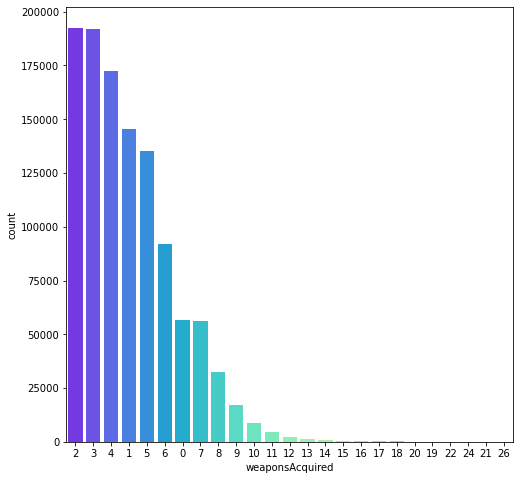

In [282]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['weaponsAcquired'],order=data['weaponsAcquired'].value_counts().iloc[:25].index,palette='rainbow')

<AxesSubplot:xlabel='weaponsAcquired', ylabel='count'>

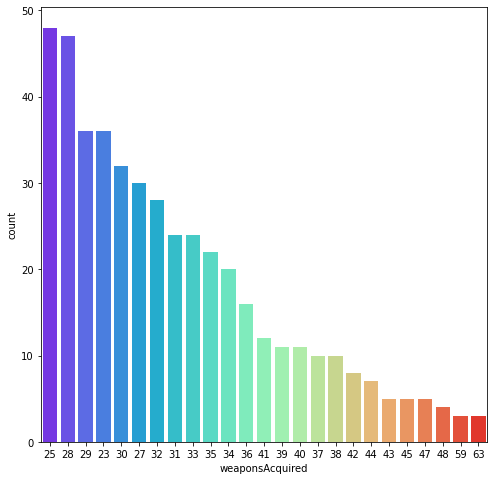

In [283]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['weaponsAcquired'],order=data['weaponsAcquired'].value_counts().iloc[25:50].index,palette='rainbow')

<AxesSubplot:xlabel='weaponsAcquired', ylabel='count'>

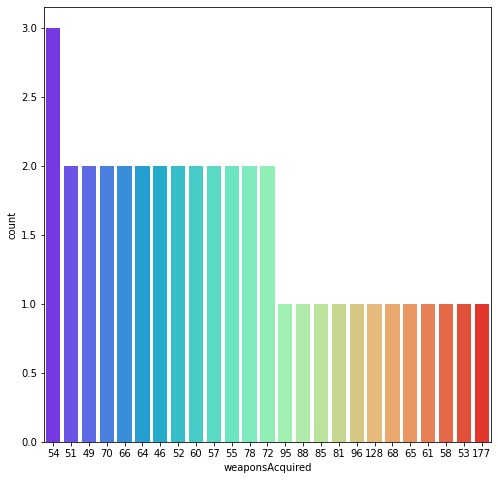

In [284]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['weaponsAcquired'],order=data['weaponsAcquired'].value_counts().iloc[50:].index,palette='rainbow')

- Generally people pick 1-5 weapons only
- Maximum weapon picked by any person is 177

<Figure size 576x576 with 0 Axes>

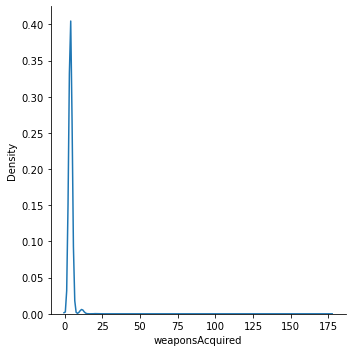

In [285]:
plt.figure(figsize=(8,8))
sns.displot(x=data['weaponsAcquired'],palette='rainbow',kind='kde')

<AxesSubplot:ylabel='weaponsAcquired'>

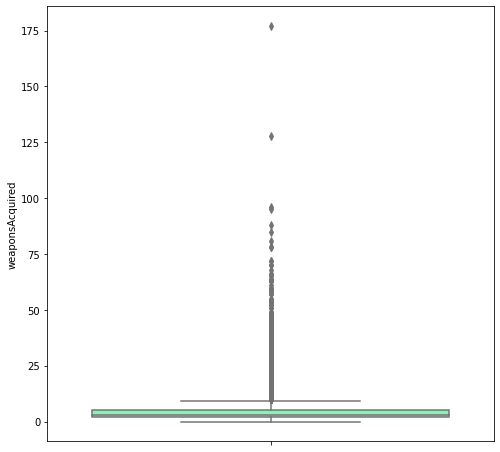

In [286]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['weaponsAcquired'],palette='rainbow')

In [287]:
weapon_outlier=iqr(data['weaponsAcquired'])

Lower limit:  -2.5
Upper limit:  9.5


In [288]:
data['weaponsAcquired']=data[(data['weaponsAcquired']>-2.5) & (data['weaponsAcquired']<9.5)]

In [289]:
data['weaponsAcquired'].fillna(data['weaponsAcquired'].median(),inplace=True)

<AxesSubplot:ylabel='weaponsAcquired'>

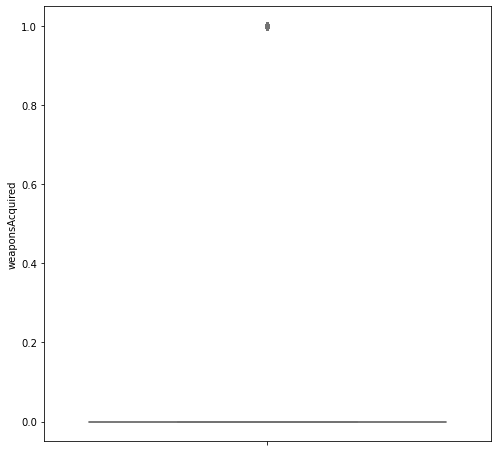

In [290]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['weaponsAcquired'],palette='rainbow')

Now, there are no outliers after cleaning the weaponsAcquired

<Figure size 576x576 with 0 Axes>

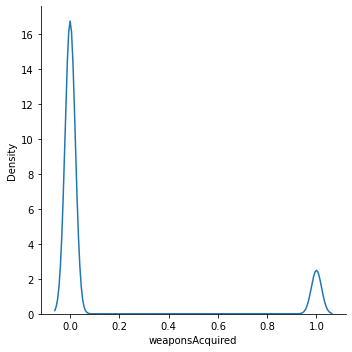

In [291]:
plt.figure(figsize=(8,8))
sns.displot(x=data['weaponsAcquired'],palette='rainbow',kind='kde')

### Analysing winPoints
- Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

In [292]:
data['winPoints'].describe()

count   1111742.000
mean        605.707
std         739.514
min           0.000
25%           0.000
50%           0.000
75%        1495.000
max        2002.000
Name: winPoints, dtype: float64

In [293]:
data['winPoints'].unique().shape

(1160,)

<Figure size 576x576 with 0 Axes>

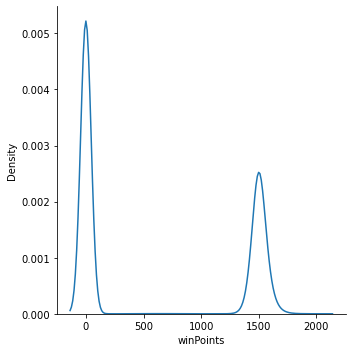

In [294]:
plt.figure(figsize=(8,8))
sns.displot(x=data['winPoints'],palette='rainbow',kind='kde')

- Win points id generally between 0-250 and 1250-1800
- Maximum winpoints is 2002.000
- % of people with 0 winpoints are 59.76485551503856%

In [295]:
win_0=data['winPoints'].value_counts()[0]/data['winPoints'].shape[0]*100
print(f"% of people with 0 winpoints are {win_0}%")

% of people with 0 winpoints are 59.76485551503856%


<AxesSubplot:ylabel='winPoints'>

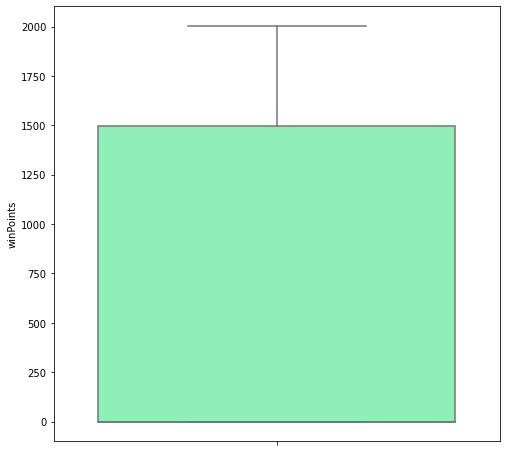

In [296]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['winPoints'],palette='rainbow')

There are no outliers in winPoints

### Analysing winPlacePerc
- The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [297]:
data['winPlacePerc'].describe()

count   1111741.000
mean          0.473
std           0.307
min           0.000
25%           0.200
50%           0.458
75%           0.741
max           1.000
Name: winPlacePerc, dtype: float64

In [298]:
data['winPlacePerc'].unique().shape

(2558,)

<Figure size 576x576 with 0 Axes>

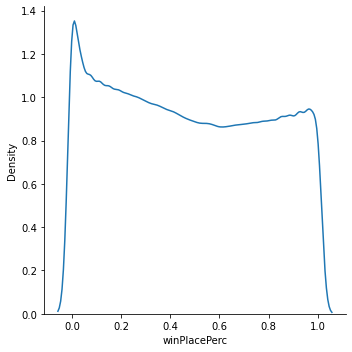

In [299]:
plt.figure(figsize=(8,8))
sns.displot(x=data['winPlacePerc'],palette='rainbow',kind='kde')

- winPlacePer range between 0 and 1
- % of people having 1 win percentage are 2.8651431717071048%

In [301]:
winP_1=data['winPlacePerc'].value_counts()[1]/data['winPlacePerc'].shape[0]*100
print(f"% of people having 1 win percentage are {winP_1}%")

% of people having 1 win percentage are 2.8651431717071048%


<AxesSubplot:ylabel='winPlacePerc'>

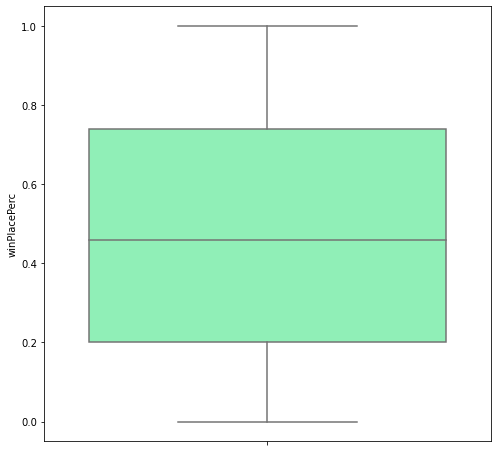

In [302]:
plt.figure(figsize=(8,8))
sns.boxplot(y=data['winPlacePerc'],palette='rainbow')

There are no outliers in winPlacePerc